In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pressure_data = pd.read_excel(r'/content/drive/MyDrive/pressure_data.xlsx')
well_log_data = pd.read_excel(r'/content/drive/MyDrive/WELL_LOG_DATA_X6.xlsx')

In [ ]:
sample_well_log_data = well_log_data.head(8)

sample_well_log_data.to_excel('sample_well_log_data.xlsx')


In [ ]:
pressure_data.head()
sample_pressure_data = pressure_data.head(8)

sample_pressure_data.to_excel('sample_pressure_data.xlsx')

In [ ]:
merged_df = pd.merge_asof(well_log_data.sort_values('DEPTH_MD'),
                          pressure_data.sort_values('DEPTH_MD'),
                          on='DEPTH_MD', direction='nearest')

# merged_df.set_index('DEPTH_MD', inplace=True)
merged_df.shape

(20694, 20)

In [ ]:
# merged_df[merged_df['DRAWDOWN/PSI'] != 1309.0][5:20]

In [ ]:
merged_df.columns

Index(['DEPTH_MD', 'BITSIZE/IN', 'CALI/IN', 'DRHO/gcc', 'GR/.API', 'NPHI',
       'PE', 'RHOB', 'RT10', 'RT20', 'RT30', 'RT60', 'RT90', 'TENS',
       'DEPTH_TVD', 'HYDROSTATIC PRESSURE/PSI', 'DRAWDOWN/PSI',
       'FORMATION PRESSURE/PSI', 'DRAWDOWN MOBILITY/md/cp', 'TEMP/F'],
      dtype='object')

In [ ]:
# df = merged_df[['DEPTH_MD', 'DRHO/gcc', 'GR/.API', 'NPHI', 'PE', 'RHOB','RT10', 'RT20','RT30', 'RT60','RT90', \
#                'HYDROSTATIC PRESSURE/PSI', 'DRAWDOWN/PSI', 'FORMATION PRESSURE/PSI', 'DRAWDOWN MOBILITY/md/cp', 'TEMP/F']]

In [ ]:
def drop_columns(data, *args):
    columns = []
    for _ in args:
        columns.append(_)

    data = data.drop(columns, axis=1)

    return data

In [ ]:
df = drop_columns(merged_df, 'TENS', 'BITSIZE/IN', 'CALI/IN', 'DEPTH_TVD', 'DRHO/gcc', 'HYDROSTATIC PRESSURE/PSI',)
df.head()

DEPTH_MD  GR/.API     NPHI      PE    RHOB    RT10    RT20    RT30  \
0   6265.00  29.6656  36.8183  8.1039  1.5988  0.0474  0.0744  0.3994   
1   6265.25  27.8500  37.7591  8.0928  1.5717  0.0496  0.0777  0.4068   
2   6265.50  26.6746  38.2957  8.0605  1.5505  0.0476  0.0747  0.4023   
3   6265.75  25.3634  39.7193  8.0771  1.5408  0.0529  0.0711  0.3941   
4   6266.00  24.2500  38.8619  8.1381  1.5406  0.0702  0.0693  0.3885   

      RT60     RT90  DRAWDOWN/PSI  FORMATION PRESSURE/PSI  \
0  15.1917  28.9828        1309.0                     NaN   
1  15.2503  27.5303        1309.0                     NaN   
2  14.9255  25.6379        1309.0                     NaN   
3  14.3861  23.6382        1309.0                     NaN   
4  13.9913  22.1365        1309.0                     NaN   

   DRAWDOWN MOBILITY/md/cp  TEMP/F  
0                      NaN   171.9  
1                      NaN   171.9  
2                      NaN   171.9  
3                      NaN   171.9  
4                      NaN   171.9

In [ ]:
df.describe()
# df_stat_desc.to_excel('df_stat_desc.xlsx')


DEPTH_MD       GR/.API          NPHI            PE          RHOB  \
count  20694.000000  20694.000000  20694.000000  20694.000000  20694.000000   
mean    8851.625000    -45.868521    -53.347063    -58.216089    -58.611529   
std     1493.496893   1051.018900    888.969085    778.073478    778.042106   
min     6265.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%     7558.312500     35.864800     21.925800      2.137100      2.185800   
50%     8851.625000     59.754000     25.573050      2.479800      2.258200   
75%    10144.937500     92.985000     29.530150      3.109175      2.408975   
max    11438.250000    256.600500     87.889500      8.984000      2.683200   

               RT10          RT20          RT30          RT60          RT90  \
count  20694.000000  20694.000000  20694.000000  20694.000000  20694.000000   
mean       2.950738      9.228186     16.551571     29.660735     39.281639   
std      522.940348    525.032628    528.592311    537.284300    543.988818   
min    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%        5.602400      5.463025      5.347600      5.454850      5.410075   
50%       17.191400     18.368900     18.703350     20.041350     21.609450   
75%       40.644750     48.774025     58.008125     70.308325     77.450525   
max      802.240900   1114.986000   1649.408000   2000.000000   2000.000000   

       DRAWDOWN/PSI  FORMATION PRESSURE/PSI  DRAWDOWN MOBILITY/md/cp  \
count  20694.000000             3862.000000              3862.000000   
mean    1824.019610             4207.587421               694.066875   
std     1076.936315               63.465794               923.004605   
min      843.000000             4110.280000                 1.670000   
25%     1309.000000             4124.590000                68.000000   
50%     1309.000000             4231.400000               132.000000   
75%     1309.000000             4264.960000              1490.000000   
max     4289.000000             4295.730000              4740.000000   

             TEMP/F  
count  20694.000000  
mean     176.963038  
std       10.547278  
min      171.900000  
25%      171.900000  
50%      171.900000  
75%      171.900000  
max      203.700000

In [ ]:
def process(data):
    cols = list(data.columns)
    for _ in cols:

        data[_] = np.where(data[_] == -9999, np.nan, data[_])
        data[_] = np.where(data[_] == -99.99, np.nan, data[_])

    return data

In [ ]:
df = process(df)

# df['NPHI_%'] = df['NPHI'] / 100
# df['FRF'] = 1 / (df['NPHI_%'] **2)
# df['Ro'] = df['FRF'] * df['RT10']
# df['Sw'] = (np.sqrt(df['Ro'] / df['RT90'])) / 100

# df = df.drop(columns=['FRF', 'Ro'])

df.describe()

DEPTH_MD       GR/.API          NPHI            PE          RHOB  \
count  20694.000000  20466.000000  20530.000000  20568.000000  20568.000000   
mean    8851.625000     65.013624     26.101894      2.681362      2.283500   
std     1493.496893     31.201836      7.519796      0.827716      0.164237   
min     6265.000000     14.819900      5.585600      0.836300      1.243100   
25%     7558.312500     36.376900     22.008300      2.143000      2.186900   
50%     8851.625000     60.612100     25.626600      2.485950      2.259500   
75%    10144.937500     93.302150     29.567300      3.111325      2.409825   
max    11438.250000    256.600500     87.889500      8.984000      2.683200   

               RT10          RT20          RT30          RT60          RT90  \
count  20638.000000  20638.000000  20638.000000  20638.000000  20638.000000   
mean      30.090443     36.384925     43.728181     56.872916     66.519926   
std       44.821077     62.175139     85.014661    125.707039    150.153379   
min        0.044100      0.044500      0.296100      0.796400      0.798600   
25%        5.635825      5.494450      5.383425      5.483050      5.438225   
50%       17.307500     18.514500     18.822650     20.278850     21.819350   
75%       40.719325     48.856825     58.067100     70.454000     77.619900   
max      802.240900   1114.986000   1649.408000   2000.000000   2000.000000   

       DRAWDOWN/PSI  FORMATION PRESSURE/PSI  DRAWDOWN MOBILITY/md/cp  \
count  20694.000000             3862.000000              3862.000000   
mean    1824.019610             4207.587421               694.066875   
std     1076.936315               63.465794               923.004605   
min      843.000000             4110.280000                 1.670000   
25%     1309.000000             4124.590000                68.000000   
50%     1309.000000             4231.400000               132.000000   
75%     1309.000000             4264.960000              1490.000000   
max     4289.000000             4295.730000              4740.000000   

             TEMP/F  
count  20694.000000  
mean     176.963038  
std       10.547278  
min      171.900000  
25%      171.900000  
50%      171.900000  
75%      171.900000  
max      203.700000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20694 entries, 0 to 20693
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DEPTH_MD                 20694 non-null  float64
 1   GR/.API                  20466 non-null  float64
 2   NPHI                     20530 non-null  float64
 3   PE                       20568 non-null  float64
 4   RHOB                     20568 non-null  float64
 5   RT10                     20638 non-null  float64
 6   RT20                     20638 non-null  float64
 7   RT30                     20638 non-null  float64
 8   RT60                     20638 non-null  float64
 9   RT90                     20638 non-null  float64
 10  DRAWDOWN/PSI             20694 non-null  float64
 11  FORMATION PRESSURE/PSI   3862 non-null   float64
 12  DRAWDOWN MOBILITY/md/cp  3862 non-null   float64
 13  TEMP/F                   20694 non-null  float64
dtypes: float64(14)
memory 

<Axes: >

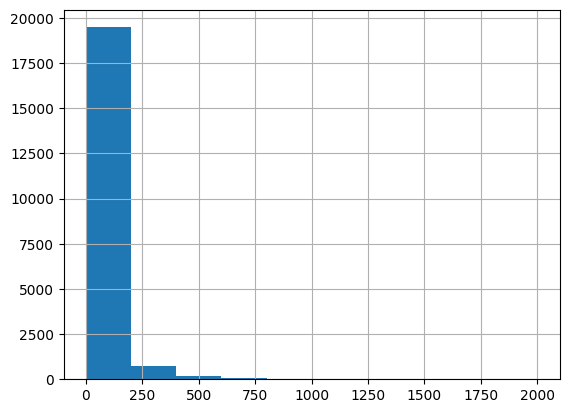

In [ ]:
df['RT90'].hist()

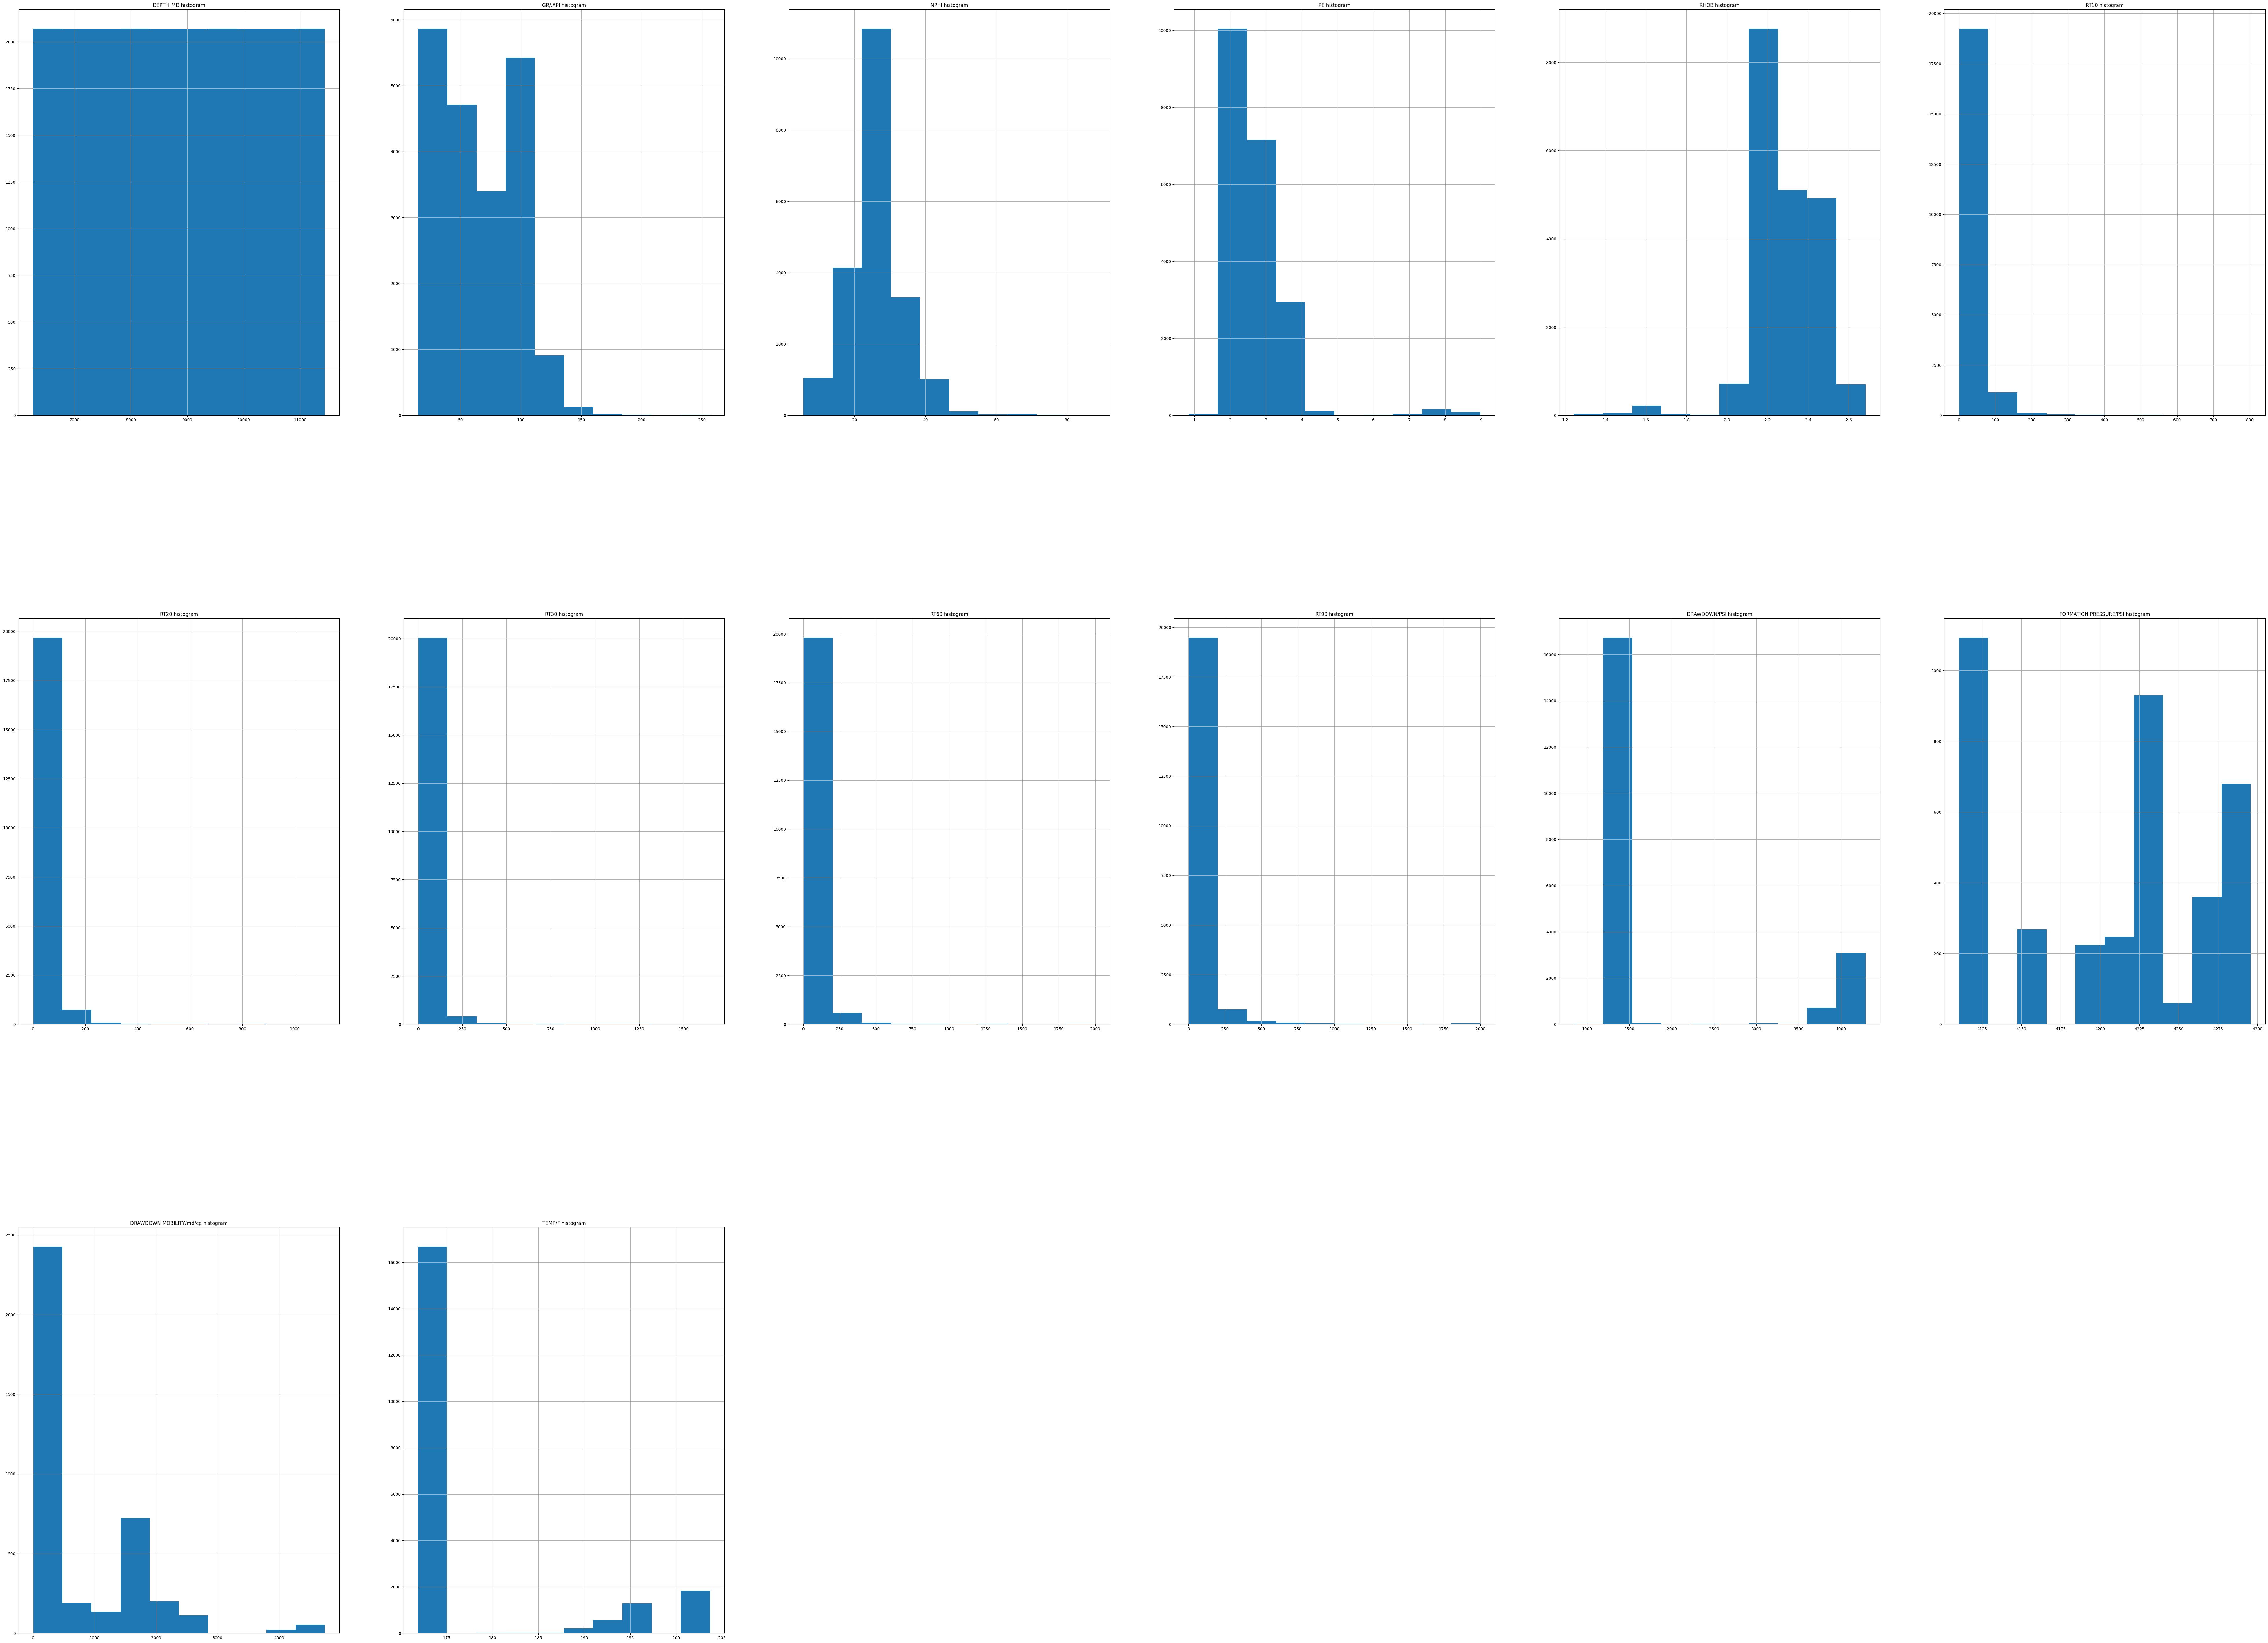

In [ ]:
fig = plt.figure(figsize=(100, 100))
fig.subplots_adjust(hspace=.5)
for i in range(len(df.columns)):
    plt.subplot(4,6, i + 1);
    df[df.columns.values[i]].hist()
    plt.title(df.columns.values[i] + ' histogram')

plt.savefig('feature_dist_plot.png', dpi=300)

In [ ]:
# pd.plotting.scatter_matrix(df, alpha = 0.3, figsize = (16,12), diagonal = 'kde');

In [ ]:
# fig, axes = plt.subplots(4, 4)
# axes = axes.flatten()
# fig.set_size_inches(16,10)
# fig.subplots_adjust(wspace=0.5)
# fig.suptitle('Distribution of properties Before Transformation \n\n red: median; blue: mean')

# for i, col in enumerate(df.columns):
#     category = df[col]
#     sns.distplot(df, label=col, ax=axes[i])
#     axes[i].axvline(category.mean(), linewidth=1)
#     axes[i].axvline(category.median(), linewidth=1, color='r')

<Axes: >

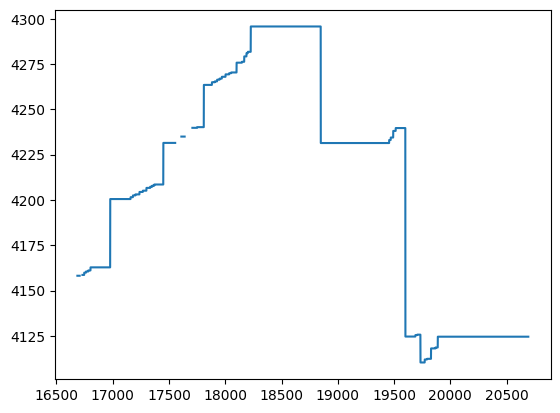

In [ ]:
df['FORMATION PRESSURE/PSI'].plot()

<Axes: >

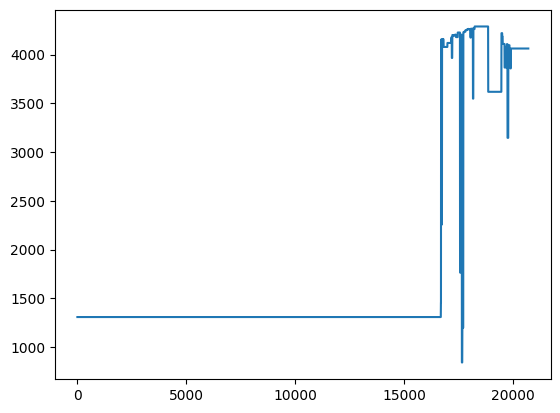

In [ ]:
df['DRAWDOWN/PSI'].plot()

In [ ]:
df.head()

DEPTH_MD  GR/.API     NPHI      PE    RHOB    RT10    RT20    RT30  \
0   6265.00  29.6656  36.8183  8.1039  1.5988  0.0474  0.0744  0.3994   
1   6265.25  27.8500  37.7591  8.0928  1.5717  0.0496  0.0777  0.4068   
2   6265.50  26.6746  38.2957  8.0605  1.5505  0.0476  0.0747  0.4023   
3   6265.75  25.3634  39.7193  8.0771  1.5408  0.0529  0.0711  0.3941   
4   6266.00  24.2500  38.8619  8.1381  1.5406  0.0702  0.0693  0.3885   

      RT60     RT90  DRAWDOWN/PSI  FORMATION PRESSURE/PSI  \
0  15.1917  28.9828        1309.0                     NaN   
1  15.2503  27.5303        1309.0                     NaN   
2  14.9255  25.6379        1309.0                     NaN   
3  14.3861  23.6382        1309.0                     NaN   
4  13.9913  22.1365        1309.0                     NaN   

   DRAWDOWN MOBILITY/md/cp  TEMP/F  
0                      NaN   171.9  
1                      NaN   171.9  
2                      NaN   171.9  
3                      NaN   171.9  
4                      NaN   171.9

In [ ]:
df_cluster = df[df['FORMATION PRESSURE/PSI'] > 0]
df_cluster = df_cluster.dropna()
df_cluster.info()
df_cluster.head(8).to_excel('merged_df_sample.xlsx')

<class 'pandas.core.frame.DataFrame'>
Index: 3634 entries, 16686 to 20465
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DEPTH_MD                 3634 non-null   float64
 1   GR/.API                  3634 non-null   float64
 2   NPHI                     3634 non-null   float64
 3   PE                       3634 non-null   float64
 4   RHOB                     3634 non-null   float64
 5   RT10                     3634 non-null   float64
 6   RT20                     3634 non-null   float64
 7   RT30                     3634 non-null   float64
 8   RT60                     3634 non-null   float64
 9   RT90                     3634 non-null   float64
 10  DRAWDOWN/PSI             3634 non-null   float64
 11  FORMATION PRESSURE/PSI   3634 non-null   float64
 12  DRAWDOWN MOBILITY/md/cp  3634 non-null   float64
 13  TEMP/F                   3634 non-null   float64
dtypes: float64(14)
memory us

In [ ]:
# pd.plotting.scatter_matrix(df_cluster, alpha = 0.3, figsize = (16,12), diagonal = 'kde')

In [ ]:
# pd.plotting.scatter_matrix(np.log(df_cluster +1), alpha = 0.3, figsize = (16,12), diagonal = 'kde')

In [ ]:
log_df_cluster = np.log(df_cluster + 1)

In [ ]:


for feature in log_df_cluster.columns.values:
    Q1 = log_df_cluster[feature].quantile(0.25)

    Q3 = log_df_cluster[feature].quantile(0.75)

    IQR = Q3- Q1

    step = 1.5 * IQR

    outliers = log_df_cluster[(log_df_cluster[feature] < Q1 - step) | (log_df_cluster[feature] > Q3 + step)]
display(f'Number of Outliers: {len(outliers)}')
# display(outliers)
# good_data = log_df_cluster.drop(outliers.index)
good_data = log_df_cluster

'Number of Outliers: 37'

In [ ]:
#Neccessary visualization Functions

###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
#
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
###########################################

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np

def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,14))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

def cluster_results(reduced_data, preds, centers):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# # Plot transformed sample points
	# ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	#            s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


def biplot(good_data, reduced_data, pca):
    '''
    Produce a biplot that shows a scatterplot of the reduced
    data and the projections of the original features.

    good_data: original data, before transformation.
               Needs to be a pandas dataframe with valid column names
    reduced_data: the reduced data (the first two dimensions are plotted)
    pca: pca object that contains the components_ attribute

    return: a matplotlib AxesSubplot object (for any additional customization)

    This procedure is inspired by the script:
    https://github.com/teddyroland/python-biplot
    '''

    fig, ax = plt.subplots(figsize = (14,8))
    # scatterplot of the reduced data
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'],
        facecolors='b', edgecolors='b', s=70, alpha=0.5)

    feature_vectors = pca.components_.T

    # we use scaling factors to make the arrows easier to see
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1],
                  head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, good_data.columns[i], color='black',
                 ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax


def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for student-selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv(r"C:\Users\OMO_MUSHIN\Desktop\Wholesale customers data.csv")
	except:
	    print ("Dataset could not be loaded. Is the file missing?")
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);

	# Plot transformed sample points
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");

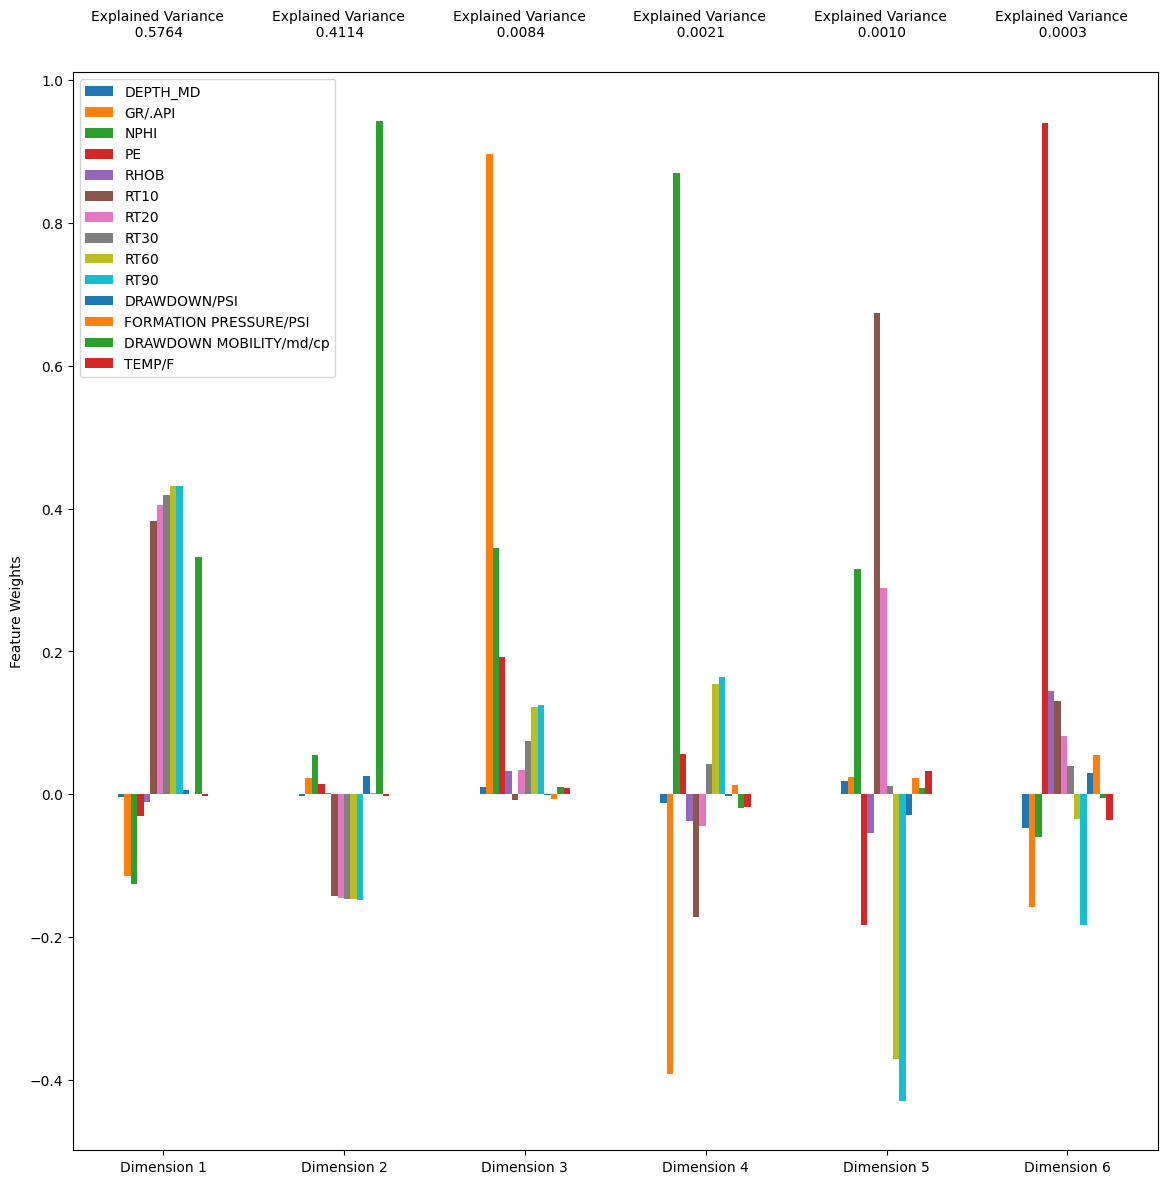

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(good_data)

pca_results = pca_results(good_data, pca)

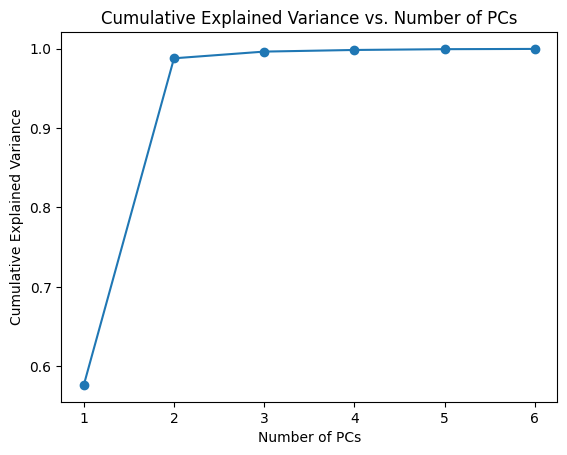

In [ ]:
num_components = np.arange(1, 7)
cumulative_variance_explained = np.cumsum(pca.explained_variance_ratio_)
plt.plot(num_components, cumulative_variance_explained, '-o');
plt.xlabel('Number of PCs'); plt.ylabel('Cumulative Explained Variance'); plt.title('Cumulative Explained Variance vs. Number of PCs');

In [ ]:
pca = PCA(n_components=2).fit(good_data)

reduced_data = pca.transform(good_data)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [ ]:
reduced_data.head()

Dimension 1  Dimension 2
0     2.981538     1.072967
1     2.885728     1.106484
2     2.798669     1.136372
3     2.737962     1.156651
4     2.739177     1.155225

In [ ]:
from sklearn.mixture import GaussianMixture

Clusters: 2; Silhouette Score = 0.4478
Clusters: 3; Silhouette Score = 0.5076
Clusters: 4; Silhouette Score = 0.4256
Clusters: 5; Silhouette Score = 0.3886
Clusters: 6; Silhouette Score = 0.3468
Clusters: 7; Silhouette Score = 0.3041
Clusters: 8; Silhouette Score = 0.3579
Clusters: 9; Silhouette Score = 0.3482
Clusters: 10; Silhouette Score = 0.3479


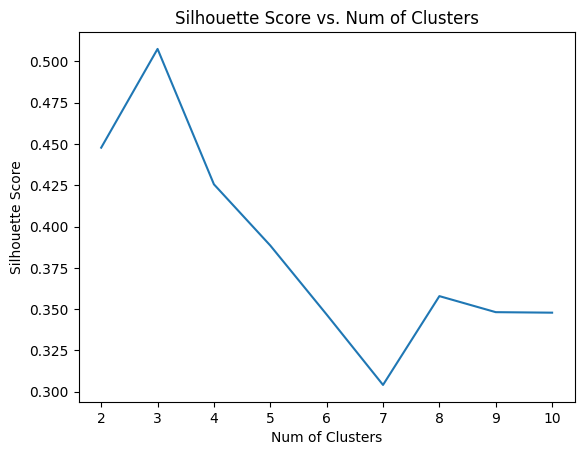

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for i in range(2, 11):
    n_clusters = i
    clusterer = GaussianMixture(n_components=n_clusters, random_state=42).fit(reduced_data)

    preds = clusterer.predict(reduced_data)

    centers = clusterer.means_

    score = silhouette_score(reduced_data, preds)
    scores.append(score)
    print('Clusters: {}; Silhouette Score = {:.4f}'.format(n_clusters, score))

plt.plot(np.arange(2,11), scores);
plt.xlabel('Num of Clusters');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score vs. Num of Clusters');

In [ ]:
clusterer_kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto', max_iter = 100)

clusterer_kmeans.fit(reduced_data)
preds = clusterer_kmeans.predict(reduced_data)
centers_kmeans = clusterer_kmeans.cluster_centers_


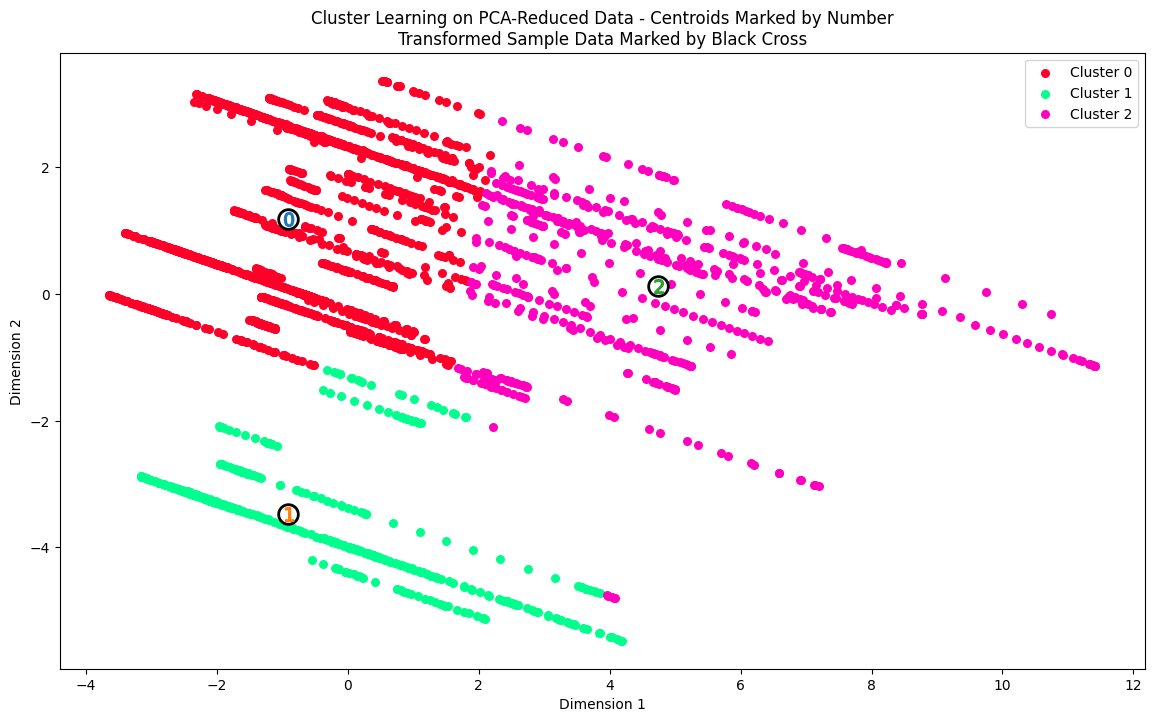

In [ ]:
cluster_results(reduced_data, preds, centers_kmeans)

In [ ]:
clusterer_gmm = GaussianMixture(n_components=3, random_state=42)

clusterer_gmm.fit(reduced_data)
preds = clusterer_gmm.predict(reduced_data)
centers_gmm = clusterer_gmm.means_

In [ ]:
centers_kmeans

array([[-0.9207707 ,  1.1835298 ],
       [-0.91468335, -3.46464651],
       [ 4.73280903,  0.12728644]])

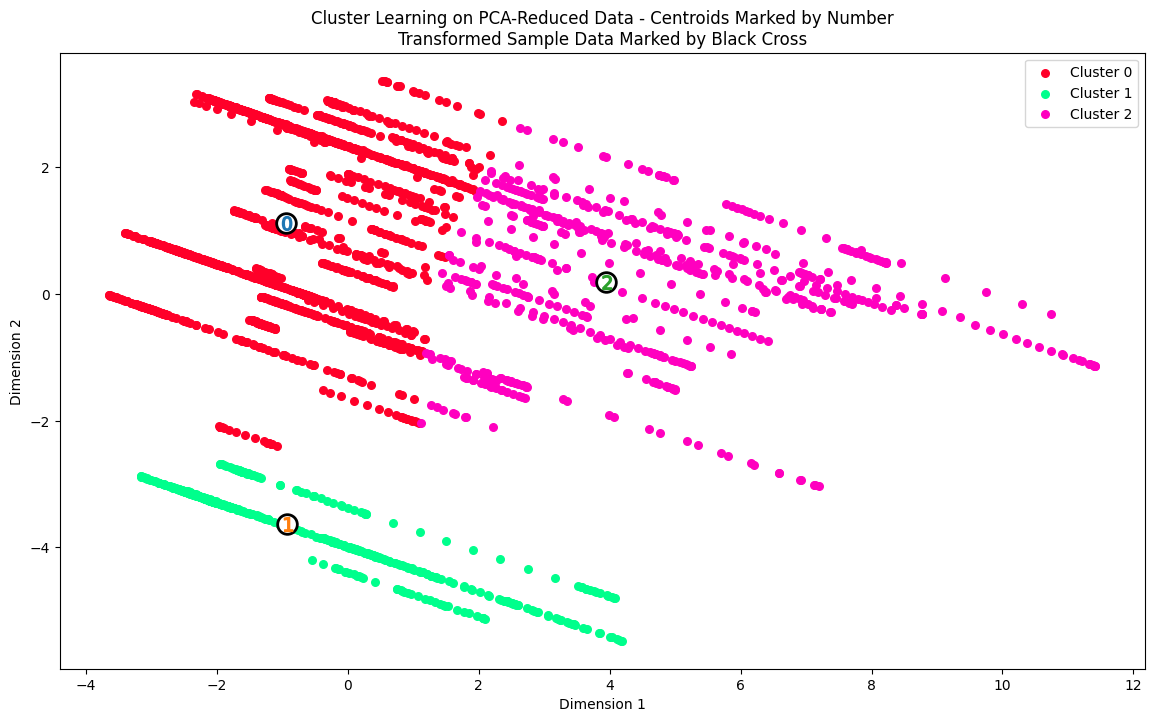

In [ ]:
cluster_results(reduced_data, preds, centers_gmm)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)
dbscan.fit(reduced_data)


DBSCAN()

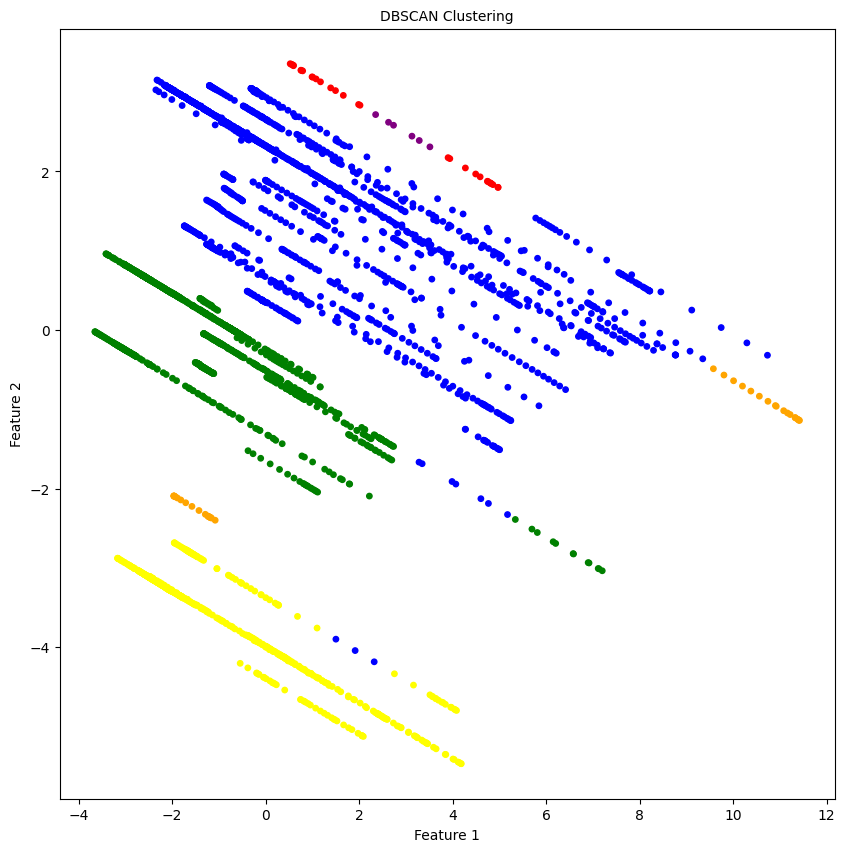

In [ ]:
import matplotlib
colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']

plt.figure(figsize=(10,10))
plt.scatter(reduced_data['Dimension 1'],reduced_data['Dimension 2'],c=dbscan.labels_,cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Feature 1',fontsize=10)
plt.ylabel('Feature 2',fontsize=10)
plt.show()

In [ ]:
merged_df.describe()

DEPTH_MD  BITSIZE/IN       CALI/IN      DRHO/gcc       GR/.API  \
count  20694.000000    20694.00  20694.000000  20694.000000  20694.000000   
mean    8851.625000       12.25    -45.900416    -60.892907    -45.868521   
std     1493.496893        0.00    760.151434    777.863536   1051.018900   
min     6265.000000       12.25  -9999.000000  -9999.000000  -9999.000000   
25%     7558.312500       12.25     12.018625     -0.003000     35.864800   
50%     8851.625000       12.25     12.107100      0.004100     59.754000   
75%    10144.937500       12.25     12.221000      0.011200     92.985000   
max    11438.250000       12.25     13.746600      0.129000    256.600500   

               NPHI            PE          RHOB          RT10          RT20  \
count  20694.000000  20694.000000  20694.000000  20694.000000  20694.000000   
mean     -53.347063    -58.216089    -58.611529      2.950738      9.228186   
std      888.969085    778.073478    778.042106    522.940348    525.032628   
min    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%       21.925800      2.137100      2.185800      5.602400      5.463025   
50%       25.573050      2.479800      2.258200     17.191400     18.368900   
75%       29.530150      3.109175      2.408975     40.644750     48.774025   
max       87.889500      8.984000      2.683200    802.240900   1114.986000   

               RT30          RT60          RT90          TENS     DEPTH_TVD  \
count  20694.000000  20694.000000  20694.000000  20694.000000  20694.000000   
mean      16.551571     29.660735     39.281639   5068.614078  10006.615309   
std      528.592311    537.284300    543.988818    767.071924    225.331564   
min    -9999.000000  -9999.000000  -9999.000000   3133.660000   9912.910000   
25%        5.347600      5.454850      5.410075   4392.605000   9912.910000   
50%       18.703350     20.041350     21.609450   4945.195000   9912.910000   
75%       58.008125     70.308325     77.450525   5814.937500   9912.910000   
max     1649.408000   2000.000000   2000.000000   6588.820000  10719.070000   

       HYDROSTATIC PRESSURE/PSI  DRAWDOWN/PSI  FORMATION PRESSURE/PSI  \
count              20694.000000  20694.000000             3862.000000   
mean                5563.681749   1824.019610             4207.587421   
std                  109.842572   1076.936315               63.465794   
min                 5485.870000    843.000000             4110.280000   
25%                 5520.230000   1309.000000             4124.590000   
50%                 5520.230000   1309.000000             4231.400000   
75%                 5520.230000   1309.000000             4264.960000   
max                 5924.640000   4289.000000             4295.730000   

       DRAWDOWN MOBILITY/md/cp        TEMP/F  
count              3862.000000  20694.000000  
mean                694.066875    176.963038  
std                 923.004605     10.547278  
min                   1.670000    171.900000  
25%                  68.000000    171.900000  
50%                 132.000000    171.900000  
75%                1490.000000    171.900000  
max                4740.000000    203.700000

In [ ]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers_gmm)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(true_centers, columns = df_cluster.keys())
# true_centers.index = segments
# print("Centers of clusters:")
# display(true_centers)
true_centers

DEPTH_MD    GR/.API       NPHI        PE      RHOB       RT10  \
0  10919.444768  88.284355  29.732532  4.160328  3.434532   5.504558   
1  11068.721131  79.362331  22.902462  3.872255  3.398038  10.913873   
2  10759.371872  49.470778  15.311976  3.528029  3.243153  41.033792   

        RT20       RT30       RT60       RT90  DRAWDOWN/PSI  \
0   5.439845   5.387150   5.313197   5.310156   4148.007043   
1  10.917393  10.867045  10.724479  10.802431   3670.831975   
2  45.331387  47.925846  50.564619  50.647609   4166.543590   

   FORMATION PRESSURE/PSI  DRAWDOWN MOBILITY/md/cp      TEMP/F  
0             4220.349827               347.528474  198.697349  
1             4180.664377                 4.014775  201.541827  
2             4224.698561               733.281338  196.503269

In [ ]:
df_cluster['DBSCAN_labels'] = dbscan.labels_
df_cluster['DBSCAN_labels'].value_counts()
df_cluster['KMeans_labels'] = clusterer_kmeans.labels_
df_cluster['GMM_labels'] = preds
df_cluster.shape

(3634, 17)

In [ ]:
df_cluster.head()

DEPTH_MD  GR/.API     NPHI      PE    RHOB     RT10     RT20     RT30  \
16686  10436.50  43.9727  15.0867  2.4353  2.2608  24.1468  25.3327  25.9126   
16687  10436.75  45.8736  15.8310  2.4519  2.2808  23.1685  24.2991  24.8307   
16688  10437.00  48.8297  16.3255  2.4653  2.2910  22.3421  23.4319  23.9004   
16689  10437.25  52.6625  16.7201  2.4918  2.2958  21.8809  22.9228  23.3143   
16690  10437.50  55.3587  16.6370  2.5267  2.2900  22.1090  23.0701  23.3717   

          RT60     RT90  DRAWDOWN/PSI  FORMATION PRESSURE/PSI  \
16686  26.6378  28.6361        4155.0                 4158.15   
16687  25.4877  27.4128        4155.0                 4158.15   
16688  24.4826  26.3326        4155.0                 4158.15   
16689  23.8183  25.6083        4155.0                 4158.15   
16690  23.8049  25.5754        4155.0                 4158.15   

       DRAWDOWN MOBILITY/md/cp  TEMP/F  DBSCAN_labels  KMeans_labels  \
16686                   1230.0   179.8              0              2   
16687                   1230.0   179.8              0              2   
16688                   1230.0   179.8              0              2   
16689                   1230.0   179.8              0              2   
16690                   1230.0   179.8              0              2   

       GMM_labels  
16686           2  
16687           2  
16688           2  
16689           2  
16690           2

In [ ]:
df_pred = df_cluster.copy()

In [ ]:
df_pred.head()

DEPTH_MD  GR/.API     NPHI      PE    RHOB     RT10     RT20     RT30  \
16686  10436.50  43.9727  15.0867  2.4353  2.2608  24.1468  25.3327  25.9126   
16687  10436.75  45.8736  15.8310  2.4519  2.2808  23.1685  24.2991  24.8307   
16688  10437.00  48.8297  16.3255  2.4653  2.2910  22.3421  23.4319  23.9004   
16689  10437.25  52.6625  16.7201  2.4918  2.2958  21.8809  22.9228  23.3143   
16690  10437.50  55.3587  16.6370  2.5267  2.2900  22.1090  23.0701  23.3717   

          RT60     RT90  DRAWDOWN/PSI  FORMATION PRESSURE/PSI  \
16686  26.6378  28.6361        4155.0                 4158.15   
16687  25.4877  27.4128        4155.0                 4158.15   
16688  24.4826  26.3326        4155.0                 4158.15   
16689  23.8183  25.6083        4155.0                 4158.15   
16690  23.8049  25.5754        4155.0                 4158.15   

       DRAWDOWN MOBILITY/md/cp  TEMP/F  DBSCAN_labels  KMeans_labels  \
16686                   1230.0   179.8              0              2   
16687                   1230.0   179.8              0              2   
16688                   1230.0   179.8              0              2   
16689                   1230.0   179.8              0              2   
16690                   1230.0   179.8              0              2   

       GMM_labels  
16686           2  
16687           2  
16688           2  
16689           2  
16690           2

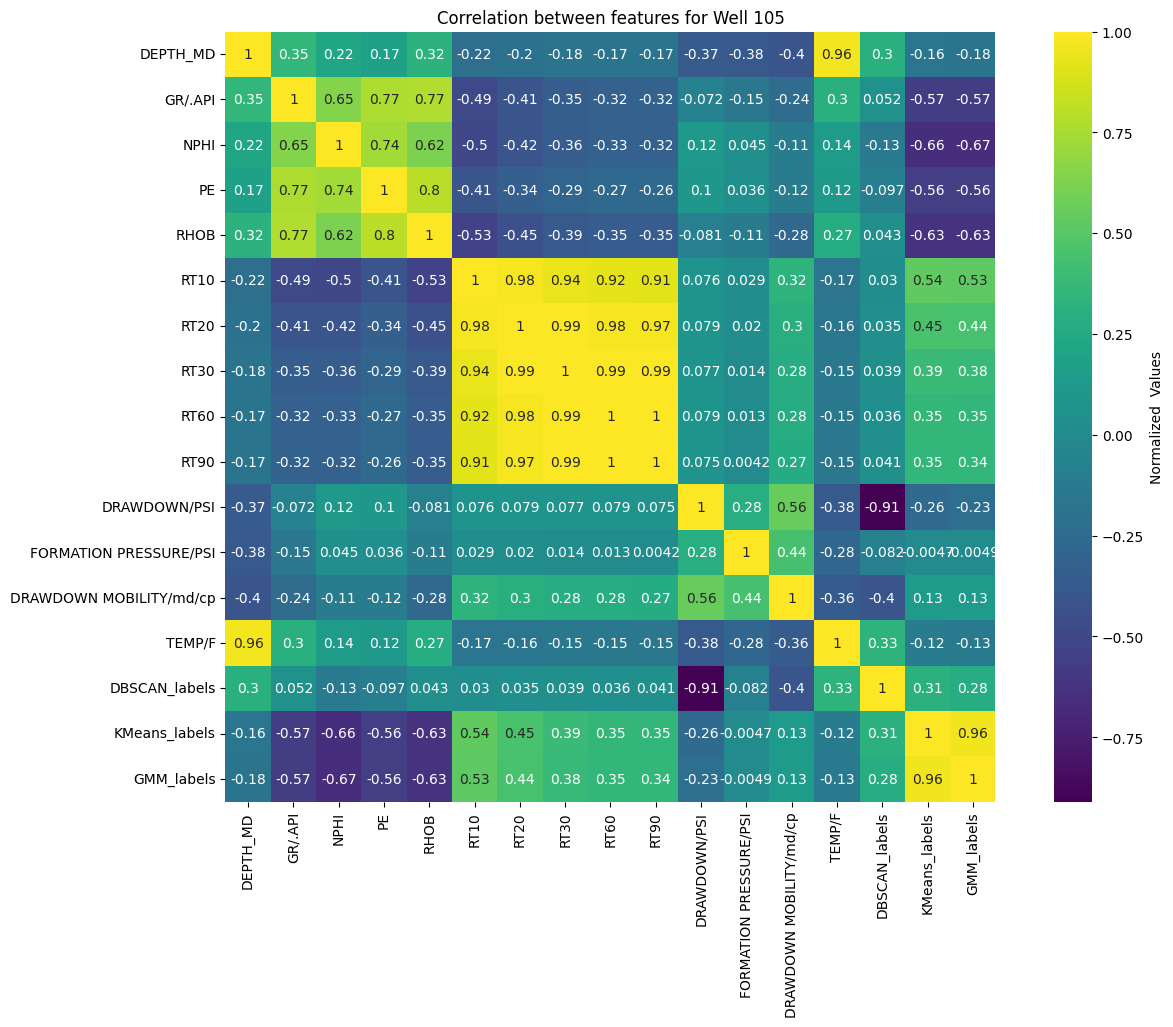

In [ ]:
plt.figure(figsize = (15,10))

ax = sns.heatmap(df_pred.corr(), annot=True, cbar=True, square=True, \
             cbar_kws={'label': 'Normalized  Values'}, cmap='viridis');

plt.title('Correlation between features for Well 105');

In [ ]:
df_pred.columns

Index(['DEPTH_MD', 'GR/.API', 'NPHI', 'PE', 'RHOB', 'RT10', 'RT20', 'RT30',
       'RT60', 'RT90', 'DRAWDOWN/PSI', 'FORMATION PRESSURE/PSI',
       'DRAWDOWN MOBILITY/md/cp', 'TEMP/F', 'DBSCAN_labels', 'KMeans_labels',
       'GMM_labels'],
      dtype='object')

In [ ]:
# df_pred.reset_index()

In [ ]:
features = df_pred.drop(['DRAWDOWN/PSI', 'FORMATION PRESSURE/PSI', 'DRAWDOWN MOBILITY/md/cp', 'DBSCAN_labels', 'KMeans_labels', 'GMM_labels'], axis=1)
labels = df_pred['GMM_labels']

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [ ]:
features.index

Index([16686, 16687, 16688, 16689, 16690, 16691, 16692, 16693, 16694, 16695,
       ...
       20456, 20457, 20458, 20459, 20460, 20461, 20462, 20463, 20464, 20465],
      dtype='int64', length=3634)

In [ ]:
features_sc = scaler.fit_transform(features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features_sc, labels, test_size = 0.25, random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 2725 samples.
Testing set has 909 samples.


In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from time import time



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
test_pred = rfc.predict(X_test)
train_pred = rfc.predict(X_train)

In [ ]:
results = {}
results['acc_train'] = accuracy_score(y_train, train_pred)
results['acc_test'] = accuracy_score(y_test, test_pred)

In [ ]:
results

{'acc_train': 1.0, 'acc_test': 0.9933993399339934}

In [ ]:
merged_df.reset_index()

index  DEPTH_MD  BITSIZE/IN    CALI/IN   DRHO/gcc    GR/.API  \
0          0   6265.00       12.25    12.3217    -1.1888    29.6656   
1          1   6265.25       12.25    12.3179    -1.1917    27.8500   
2          2   6265.50       12.25    12.3141    -1.1953    26.6746   
3          3   6265.75       12.25    12.3200    -1.1983    25.3634   
4          4   6266.00       12.25    12.3147    -1.1988    24.2500   
...      ...       ...         ...        ...        ...        ...   
20689  20689  11437.25       12.25 -9999.0000 -9999.0000 -9999.0000   
20690  20690  11437.50       12.25 -9999.0000 -9999.0000 -9999.0000   
20691  20691  11437.75       12.25 -9999.0000 -9999.0000 -9999.0000   
20692  20692  11438.00       12.25 -9999.0000 -9999.0000 -9999.0000   
20693  20693  11438.25       12.25 -9999.0000 -9999.0000 -9999.0000   

            NPHI         PE       RHOB       RT10  ...       RT30       RT60  \
0        36.8183     8.1039     1.5988     0.0474  ...     0.3994    15.1917   
1        37.7591     8.0928     1.5717     0.0496  ...     0.4068    15.2503   
2        38.2957     8.0605     1.5505     0.0476  ...     0.4023    14.9255   
3        39.7193     8.0771     1.5408     0.0529  ...     0.3941    14.3861   
4        38.8619     8.1381     1.5406     0.0702  ...     0.3885    13.9913   
...          ...        ...        ...        ...  ...        ...        ...   
20689 -9999.0000 -9999.0000 -9999.0000 -9999.0000  ... -9999.0000 -9999.0000   
20690 -9999.0000 -9999.0000 -9999.0000 -9999.0000  ... -9999.0000 -9999.0000   
20691 -9999.0000 -9999.0000 -9999.0000 -9999.0000  ... -9999.0000 -9999.0000   
20692 -9999.0000 -9999.0000 -9999.0000 -9999.0000  ... -9999.0000 -9999.0000   
20693 -9999.0000 -9999.0000 -9999.0000 -9999.0000  ... -9999.0000 -9999.0000   

            RT90     TENS  DEPTH_TVD  HYDROSTATIC PRESSURE/PSI  DRAWDOWN/PSI  \
0        28.9828  3927.19    9912.91                   5520.23        1309.0   
1        27.5303  3922.28    9912.91                   5520.23        1309.0   
2        25.6379  3930.40    9912.91                   5520.23        1309.0   
3        23.6382  3950.48    9912.91                   5520.23        1309.0   
4        22.1365  3966.14    9912.91                   5520.23        1309.0   
...          ...      ...        ...                       ...           ...   
20689 -9999.0000  3503.87   10719.07                   5924.64        4063.0   
20690 -9999.0000  3422.36   10719.07                   5924.64        4063.0   
20691 -9999.0000  3334.58   10719.07                   5924.64        4063.0   
20692 -9999.0000  3236.95   10719.07                   5924.64        4063.0   
20693 -9999.0000  3133.66   10719.07                   5924.64        4063.0   

       FORMATION PRESSURE/PSI  DRAWDOWN MOBILITY/md/cp  TEMP/F  
0                         NaN                      NaN   171.9  
1                         NaN                      NaN   171.9  
2                         NaN                      NaN   171.9  
3                         NaN                      NaN   171.9  
4                         NaN                      NaN   171.9  
...                       ...                      ...     ...  
20689                 4124.51                    132.0   203.7  
20690                 4124.51                    132.0   203.7  
20691                 4124.51                    132.0   203.7  
20692                 4124.51                    132.0   203.7  
20693                 4124.51                    132.0   203.7  

[20694 rows x 21 columns]

In [ ]:
well_log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20694 entries, 0 to 20693
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DEPTH_MD    20694 non-null  float64
 1   BITSIZE/IN  20694 non-null  float64
 2   CALI/IN     20694 non-null  float64
 3   DRHO/gcc    20694 non-null  float64
 4   GR/.API     20694 non-null  float64
 5   NPHI        20694 non-null  float64
 6   PE          20694 non-null  float64
 7   RHOB        20694 non-null  float64
 8   RT10        20694 non-null  float64
 9   RT20        20694 non-null  float64
 10  RT30        20694 non-null  float64
 11  RT60        20694 non-null  float64
 12  RT90        20694 non-null  float64
 13  TENS        20694 non-null  float64
dtypes: float64(14)
memory usage: 2.2 MB


In [ ]:
well_log_data.describe()

DEPTH_MD  BITSIZE/IN       CALI/IN      DRHO/gcc       GR/.API  \
count  20694.000000    20694.00  20694.000000  20694.000000  20694.000000   
mean    8851.625000       12.25    -45.900416    -60.892907    -45.868521   
std     1493.496893        0.00    760.151434    777.863536   1051.018900   
min     6265.000000       12.25  -9999.000000  -9999.000000  -9999.000000   
25%     7558.312500       12.25     12.018625     -0.003000     35.864800   
50%     8851.625000       12.25     12.107100      0.004100     59.754000   
75%    10144.937500       12.25     12.221000      0.011200     92.985000   
max    11438.250000       12.25     13.746600      0.129000    256.600500   

               NPHI            PE          RHOB          RT10          RT20  \
count  20694.000000  20694.000000  20694.000000  20694.000000  20694.000000   
mean     -53.347063    -58.216089    -58.611529      2.950738      9.228186   
std      888.969085    778.073478    778.042106    522.940348    525.032628   
min    -9999.000000  -9999.000000  -9999.000000  -9999.000000  -9999.000000   
25%       21.925800      2.137100      2.185800      5.602400      5.463025   
50%       25.573050      2.479800      2.258200     17.191400     18.368900   
75%       29.530150      3.109175      2.408975     40.644750     48.774025   
max       87.889500      8.984000      2.683200    802.240900   1114.986000   

               RT30          RT60          RT90          TENS  
count  20694.000000  20694.000000  20694.000000  20694.000000  
mean      16.551571     29.660735     39.281639   5068.614078  
std      528.592311    537.284300    543.988818    767.071924  
min    -9999.000000  -9999.000000  -9999.000000   3133.660000  
25%        5.347600      5.454850      5.410075   4392.605000  
50%       18.703350     20.041350     21.609450   4945.195000  
75%       58.008125     70.308325     77.450525   5814.937500  
max     1649.408000   2000.000000   2000.000000   6588.820000

In [ ]:
merged_df_clean = process(merged_df)
merged_df_clean = merged_df_clean[features.columns]
df_clean = merged_df_clean.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20466 entries, 0 to 20465
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DEPTH_MD  20466 non-null  float64
 1   GR/.API   20466 non-null  float64
 2   NPHI      20466 non-null  float64
 3   PE        20466 non-null  float64
 4   RHOB      20466 non-null  float64
 5   RT10      20466 non-null  float64
 6   RT20      20466 non-null  float64
 7   RT30      20466 non-null  float64
 8   RT60      20466 non-null  float64
 9   RT90      20466 non-null  float64
 10  TEMP/F    20466 non-null  float64
dtypes: float64(11)
memory usage: 1.9 MB


In [ ]:
sc_df_clean = scaler.fit_transform(df_clean)

In [ ]:
sc_df_clean

array([[-1.73196618, -1.13291047,  1.42182239, ..., -0.33402948,
        -0.25267375, -0.46630919],
       [-1.73179692, -1.19110078,  1.54682134, ..., -0.33356489,
        -0.26231425, -0.46630919],
       [-1.73162766, -1.22877256,  1.61811645, ..., -0.33613993,
        -0.27487444, -0.46630919],
       ...,
       [ 1.73162766,  1.37330453, -0.79887542, ..., -0.40489607,
        -0.40353808,  2.64556559],
       [ 1.73179692,  1.40336439, -0.73337321, ..., -0.40497535,
        -0.40358454,  2.64556559],
       [ 1.73196618,  1.41287368, -0.61092526, ..., -0.4047383 ,
        -0.40336618,  2.64556559]])

In [ ]:
new_pred = rfc.predict(sc_df_clean)

In [ ]:
df_clean['Pred_clusters'] = new_pred

In [ ]:
df_clean['Pred_clusters'].value_counts()

Pred_clusters
0    12574
2     7512
1      380
Name: count, dtype: int64

In [ ]:
df_clean

DEPTH_MD   GR/.API     NPHI      PE    RHOB    RT10    RT20    RT30  \
0       6265.00   29.6656  36.8183  8.1039  1.5988  0.0474  0.0744  0.3994   
1       6265.25   27.8500  37.7591  8.0928  1.5717  0.0496  0.0777  0.4068   
2       6265.50   26.6746  38.2957  8.0605  1.5505  0.0476  0.0747  0.4023   
3       6265.75   25.3634  39.7193  8.0771  1.5408  0.0529  0.0711  0.3941   
4       6266.00   24.2500  38.8619  8.1381  1.5406  0.0702  0.0693  0.3885   
...         ...       ...      ...     ...     ...     ...     ...     ...   
20461  11380.25  108.3780  20.4560  2.9529  2.4706  6.1977  6.2501  6.2953   
20462  11380.50  108.0814  20.1289  2.9371  2.4725  6.1372  6.1864  6.2331   
20463  11380.75  107.8622  20.1043  2.9558  2.4758  6.0972  6.1446  6.1934   
20464  11381.00  108.8001  20.5973  3.0051  2.4804  6.0847  6.1333  6.1849   
20465  11381.25  109.0968  21.5189  3.0697  2.4880  6.1075  6.1607  6.2162   

          RT60     RT90  TEMP/F  Pred_clusters  
0      15.1917  28.9828   171.9              0  
1      15.2503  27.5303   171.9              0  
2      14.9255  25.6379   171.9              0  
3      14.3861  23.6382   171.9              0  
4      13.9913  22.1365   171.9              0  
...        ...      ...     ...            ...  
20461   6.3584   6.3527   203.7              0  
20462   6.2946   6.2915   203.7              0  
20463   6.2530   6.2526   203.7              0  
20464   6.2430   6.2456   203.7              0  
20465   6.2729   6.2785   203.7              0  

[20466 rows x 12 columns]

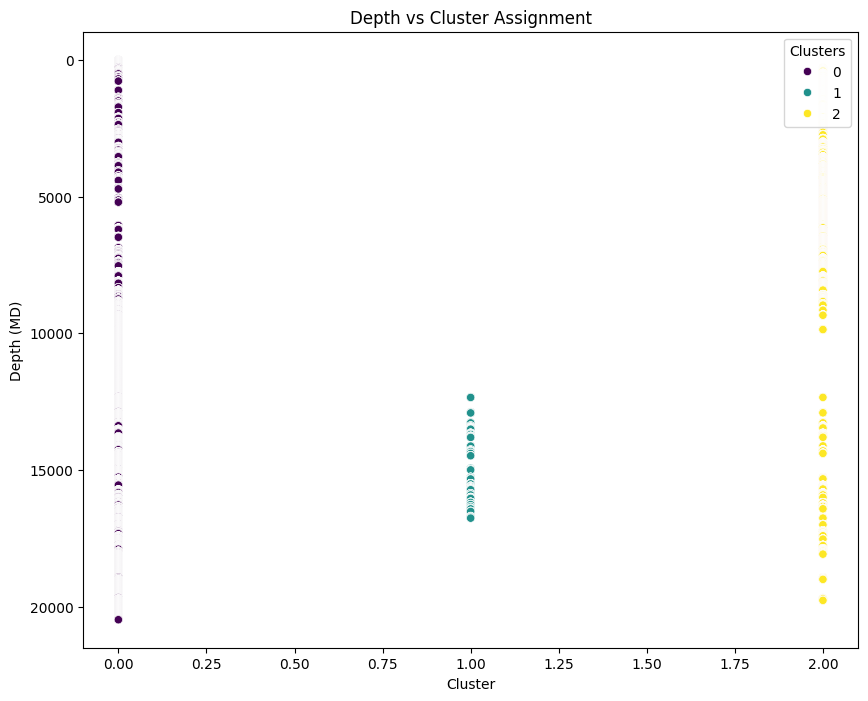

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_clean' contains the depth and predicted cluster labels
plt.figure(figsize=(10, 8))

# Scatter plot where DEPTH_MD is the y-axis (well depth), and Pred_clusters represent the clusters
sns.scatterplot(x='Pred_clusters', y=df_clean.index, data=df_clean, hue='Pred_clusters', palette='viridis')

# Reverse the y-axis since depth increases downwards
plt.gca().invert_yaxis()

plt.title('Depth vs Cluster Assignment')
plt.xlabel('Cluster')
plt.ylabel('Depth (MD)')
plt.legend(title='Clusters', loc='upper right')
plt.show()


In [ ]:
# merged_df

In [ ]:
good_data.shape

(3634, 14)

In [ ]:
df_clean.columns

Index(['DEPTH_MD', 'GR/.API', 'NPHI', 'PE', 'RHOB', 'RT10', 'RT20', 'RT30',
       'RT60', 'RT90', 'TEMP/F', 'Pred_clusters'],
      dtype='object')

In [ ]:
features_2 = df_cluster[['DEPTH_MD', 'GR/.API', 'NPHI', 'PE', 'RHOB', 'RT10', 'RT20', 'RT30',
       'RT60', 'RT90', 'TEMP/F', 'GMM_labels']]
labels_2 = good_data['FORMATION PRESSURE/PSI']
features_2.head()

DEPTH_MD  GR/.API     NPHI      PE    RHOB     RT10     RT20     RT30  \
16686  10436.50  43.9727  15.0867  2.4353  2.2608  24.1468  25.3327  25.9126   
16687  10436.75  45.8736  15.8310  2.4519  2.2808  23.1685  24.2991  24.8307   
16688  10437.00  48.8297  16.3255  2.4653  2.2910  22.3421  23.4319  23.9004   
16689  10437.25  52.6625  16.7201  2.4918  2.2958  21.8809  22.9228  23.3143   
16690  10437.50  55.3587  16.6370  2.5267  2.2900  22.1090  23.0701  23.3717   

          RT60     RT90  TEMP/F  GMM_labels  
16686  26.6378  28.6361   179.8           2  
16687  25.4877  27.4128   179.8           2  
16688  24.4826  26.3326   179.8           2  
16689  23.8183  25.6083   179.8           2  
16690  23.8049  25.5754   179.8           2

In [ ]:
features_sc_2 = scaler.fit_transform(features_2)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_sc_2, labels_2, test_size = 0.25, random_state = 42)

# Show the results of the split
print("Training set has {} samples.".format(X_train_2.shape[0]))
print("Testing set has {} samples.".format(X_test_2.shape[0]))

Training set has 2725 samples.
Testing set has 909 samples.


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfc_2 = RandomForestRegressor(random_state=42)

In [ ]:
# X_train_2

In [ ]:
rfc_2.fit(X_train_2, y_train_2)

RandomForestRegressor(random_state=42)

In [ ]:
test_pred_2 = np.exp(rfc_2.predict(X_test_2))
train_pred_2 = np.exp(rfc_2.predict(X_train_2))

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

results_2 = {}
results_2['mae_train'] = mae(np.exp(y_train_2), train_pred_2)
results_2['mae_test'] = mae(np.exp(y_test_2), test_pred_2)

results_2['mse_train'] = mse(np.exp(y_train_2), train_pred_2)
results_2['mse_test'] = mse(np.exp(y_test_2), test_pred_2)

results_2['r2_train'] = r2_score(np.exp(y_train_2), train_pred_2)
results_2['r2_test'] = r2_score(np.exp(y_test_2), test_pred_2)



In [ ]:
(train_pred_2)

array([4201.48, 4232.47, 4161.49, ..., 4235.96, 4125.51, 4125.51])

In [ ]:
results_2

{'mae_train': 0.04478188500657596,
 'mae_test': 0.0536332136729094,
 'mse_train': 0.23929992350414,
 'mse_test': 0.1947294148188394,
 'r2_train': 0.9999374348440465,
 'r2_test': 0.9999487914922262}

In [ ]:
df_clean_pressure_pred = df_clean[['DEPTH_MD', 'GR/.API', 'NPHI', 'PE', 'RHOB', 'RT10', 'RT20', 'RT30',
       'RT60', 'RT90', 'TEMP/F', 'Pred_clusters']]

In [ ]:
df_clean_pressure_pred_sc = scaler.fit_transform(df_clean_pressure_pred)

In [ ]:
pressure_pred = np.exp(rfc_2.predict(df_clean_pressure_pred))

In [ ]:
df_clean_pressure_pred['Pred_Form_Press'] = pressure_pred

In [ ]:
df_clean.describe()

DEPTH_MD       GR/.API          NPHI           PE          RHOB  \
count  20466.00000  20466.000000  20466.000000  20466.00000  20466.000000   
mean    8823.12500     65.013624     26.117006      2.67871      2.282252   
std     1477.04241     31.201836      7.526647      0.82888      0.163682   
min     6265.00000     14.819900      5.585600      0.83630      1.243100   
25%     7544.06250     36.376900     22.039300      2.14115      2.186700   
50%     8823.12500     60.612100     25.648050      2.48105      2.258500   
75%    10102.18750     93.302150     29.591675      3.10680      2.407800   
max    11381.25000    256.600500     87.889500      8.98400      2.683200   

               RT10          RT20          RT30          RT60          RT90  \
count  20466.000000  20466.000000  20466.000000  20466.000000  20466.000000   
mean      30.316541     36.663827     44.068880     57.324234     67.052269   
std       44.940634     62.360920     85.289436    126.137263    150.670177   
min        0.044100      0.044500      0.296100      0.796400      0.798600   
25%        5.732225      5.566875      5.457500      5.568775      5.524650   
50%       17.685150     18.993650     19.372200     20.915300     22.427250   
75%       41.000025     49.152750     58.560650     70.951000     78.344075   
max      802.240900   1114.986000   1649.408000   2000.000000   2000.000000   

             TEMP/F  Pred_clusters  
count  20466.000000   20466.000000  
mean     176.665176       0.752663  
std       10.219170       0.959324  
min      171.900000       0.000000  
25%      171.900000       0.000000  
50%      171.900000       0.000000  
75%      171.900000       2.000000  
max      203.700000       2.000000

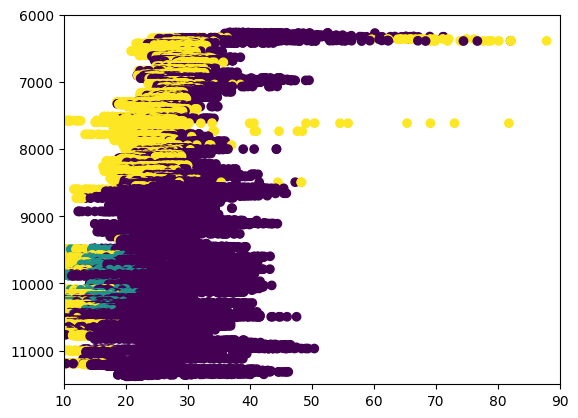

In [ ]:
plt.scatter(x=df_clean['NPHI'], y=df_clean['DEPTH_MD'], c=df_clean['Pred_clusters'])
plt.ylim(11500, 6000)
plt.xlim(10, 90)
plt.show()

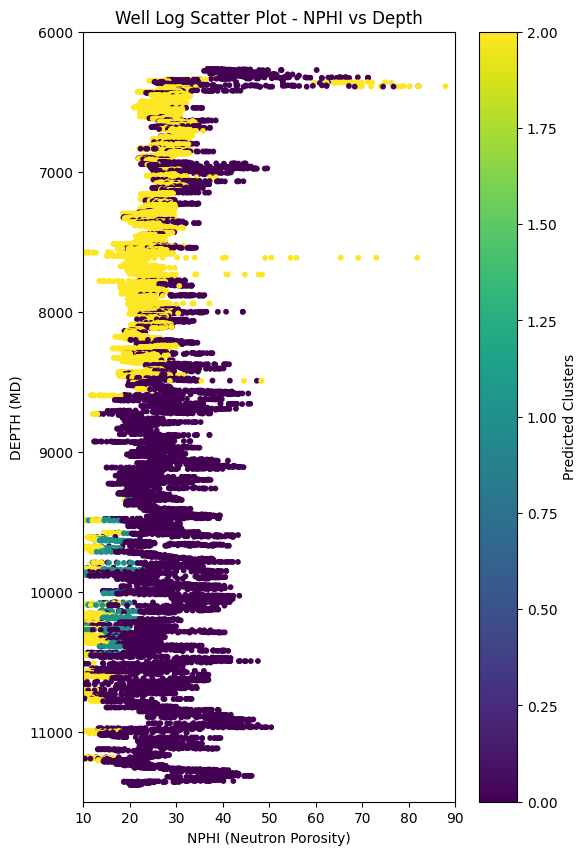

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot in well log format
plt.figure(figsize=(6, 10))  # Set the figure size to resemble well log proportions

# Create scatter plot with NPHI (Neutron Porosity) on the x-axis and depth on the y-axis
plt.scatter(x=df_clean['NPHI'], y=df_clean['DEPTH_MD'], c=df_clean['Pred_clusters'], cmap='viridis', s=10)

# Invert y-axis to represent the well log format (depth increases as you go down)
plt.gca().invert_yaxis()

# Set depth range (y-axis) and porosity range (x-axis)
plt.ylim(11500, 6000)  # Depth range in MD (Measured Depth)
plt.xlim(10, 90)       # NPHI (Neutron Porosity) range in porosity units (phi)

# Add labels and title
plt.xlabel('NPHI (Neutron Porosity)')
plt.ylabel('DEPTH (MD)')
plt.title('Well Log Scatter Plot - NPHI vs Depth')

# Display the color bar for cluster labels
plt.colorbar(label='Predicted Clusters')

# Show the plot
plt.show()


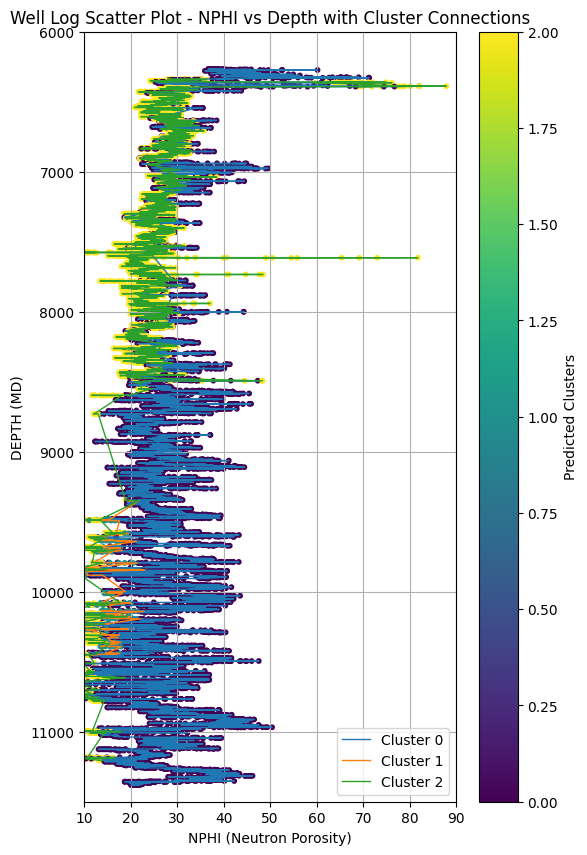

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize the figure for well log style
plt.figure(figsize=(6, 10))

# Scatter plot for well log format
plt.scatter(x=df_clean['NPHI'], y=df_clean['DEPTH_MD'], c=df_clean['Pred_clusters'], cmap='viridis', s=10)

# Invert y-axis for well log style (depth increases as you go down)
plt.gca().invert_yaxis()

# Set depth range and porosity range
plt.ylim(11500, 6000)
plt.xlim(10, 90)

# Plot lines connecting points of the same cluster
for cluster in np.unique(df_clean['Pred_clusters']):
    cluster_data = df_clean[df_clean['Pred_clusters'] == cluster].sort_values('DEPTH_MD')

    # Plot a line connecting the points for this cluster
    plt.plot(cluster_data['NPHI'], cluster_data['DEPTH_MD'], label=f'Cluster {cluster}', linewidth=1)
    plt.grid(True)
# Add labels and title
plt.xlabel('NPHI (Neutron Porosity)')
plt.ylabel('DEPTH (MD)')
plt.title('Well Log Scatter Plot - NPHI vs Depth with Cluster Connections')

# Add a color bar for cluster labels
plt.colorbar(label='Predicted Clusters')

# Display the legend
plt.legend()

# Show the plot
plt.show()


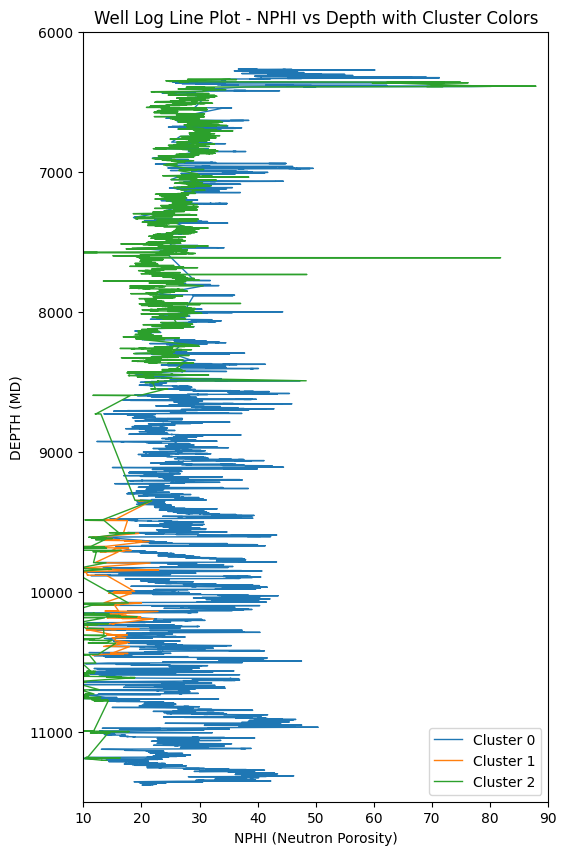

In [ ]:
plt.figure(figsize=(6, 10))

# Plot NPHI vs. Depth and color by cluster
for cluster in np.unique(df_clean['Pred_clusters']):
    cluster_data = df_clean[df_clean['Pred_clusters'] == cluster].sort_values('DEPTH_MD')
    plt.plot(cluster_data['NPHI'], cluster_data['DEPTH_MD'], label=f'Cluster {cluster}', linewidth=1)

plt.gca().invert_yaxis()
plt.ylim(11500, 6000)
plt.xlim(10, 90)

plt.xlabel('NPHI (Neutron Porosity)')
plt.ylabel('DEPTH (MD)')
plt.title('Well Log Line Plot - NPHI vs Depth with Cluster Colors')
plt.legend()
plt.show()


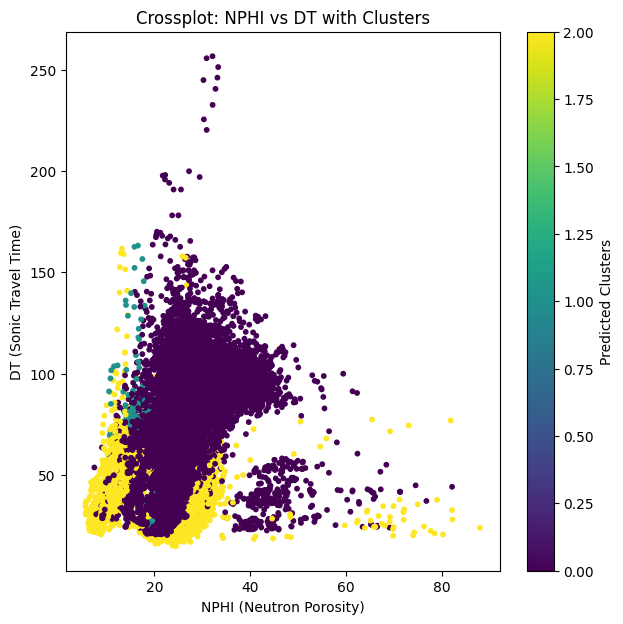

In [ ]:
plt.figure(figsize=(7, 7))

# Crossplot NPHI vs. DT with cluster coloring
plt.scatter(df_clean['NPHI'], df_clean['GR/.API'], c=df_clean['Pred_clusters'], cmap='viridis', s=10)

plt.xlabel('NPHI (Neutron Porosity)')
plt.ylabel('DT (Sonic Travel Time)')
plt.title('Crossplot: NPHI vs DT with Clusters')
plt.colorbar(label='Predicted Clusters')

plt.show()


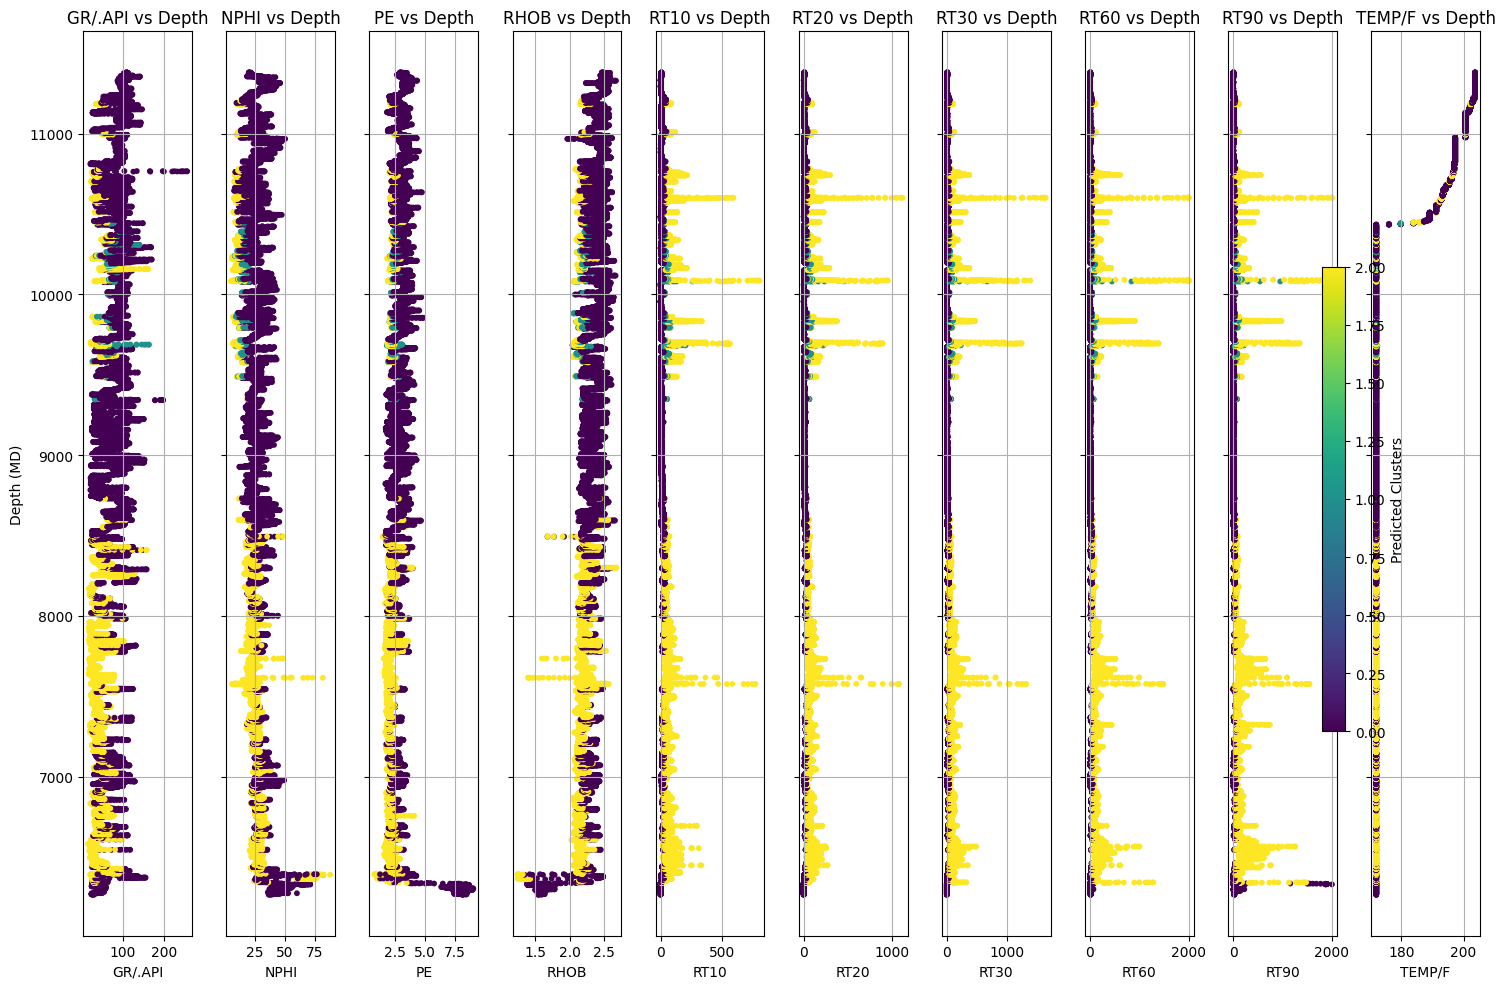

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the properties you want to plot against depth
properties = ['GR/.API', 'NPHI', 'PE', 'RHOB', 'RT10', 'RT20', 'RT30',\
       'RT60', 'RT90', 'TEMP/F']  # Replace these with the actual property names in your dataset
depth = 'DEPTH_MD'  # Define the depth column
clusters = 'Pred_clusters'  # Column for cluster labels

# Set up the figure and axes for multiple subplots
num_plots = len(properties)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 10), sharey=True)

# Loop through each property and create a subplot for it
for i, prop in enumerate(properties):
    ax = axes[i]

    # Plot the property vs depth and color by clusters
    scatter = ax.scatter(df_clean[prop], df_clean[depth], c=df_clean[clusters], cmap='viridis', s=10)

    # Invert the y-axis (depth increases downwards)
    ax.invert_yaxis()

    # Set x and y labels
    ax.set_xlabel(prop)
    if i == 0:
        ax.set_ylabel('Depth (MD)')

    # Add a title for each subplot
    ax.set_title(f'{prop} vs Depth')
    ax.grid()

# Add a color bar to show the cluster label meanings
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Predicted Clusters')

# Adjust layout
plt.tight_layout()

plt.show()


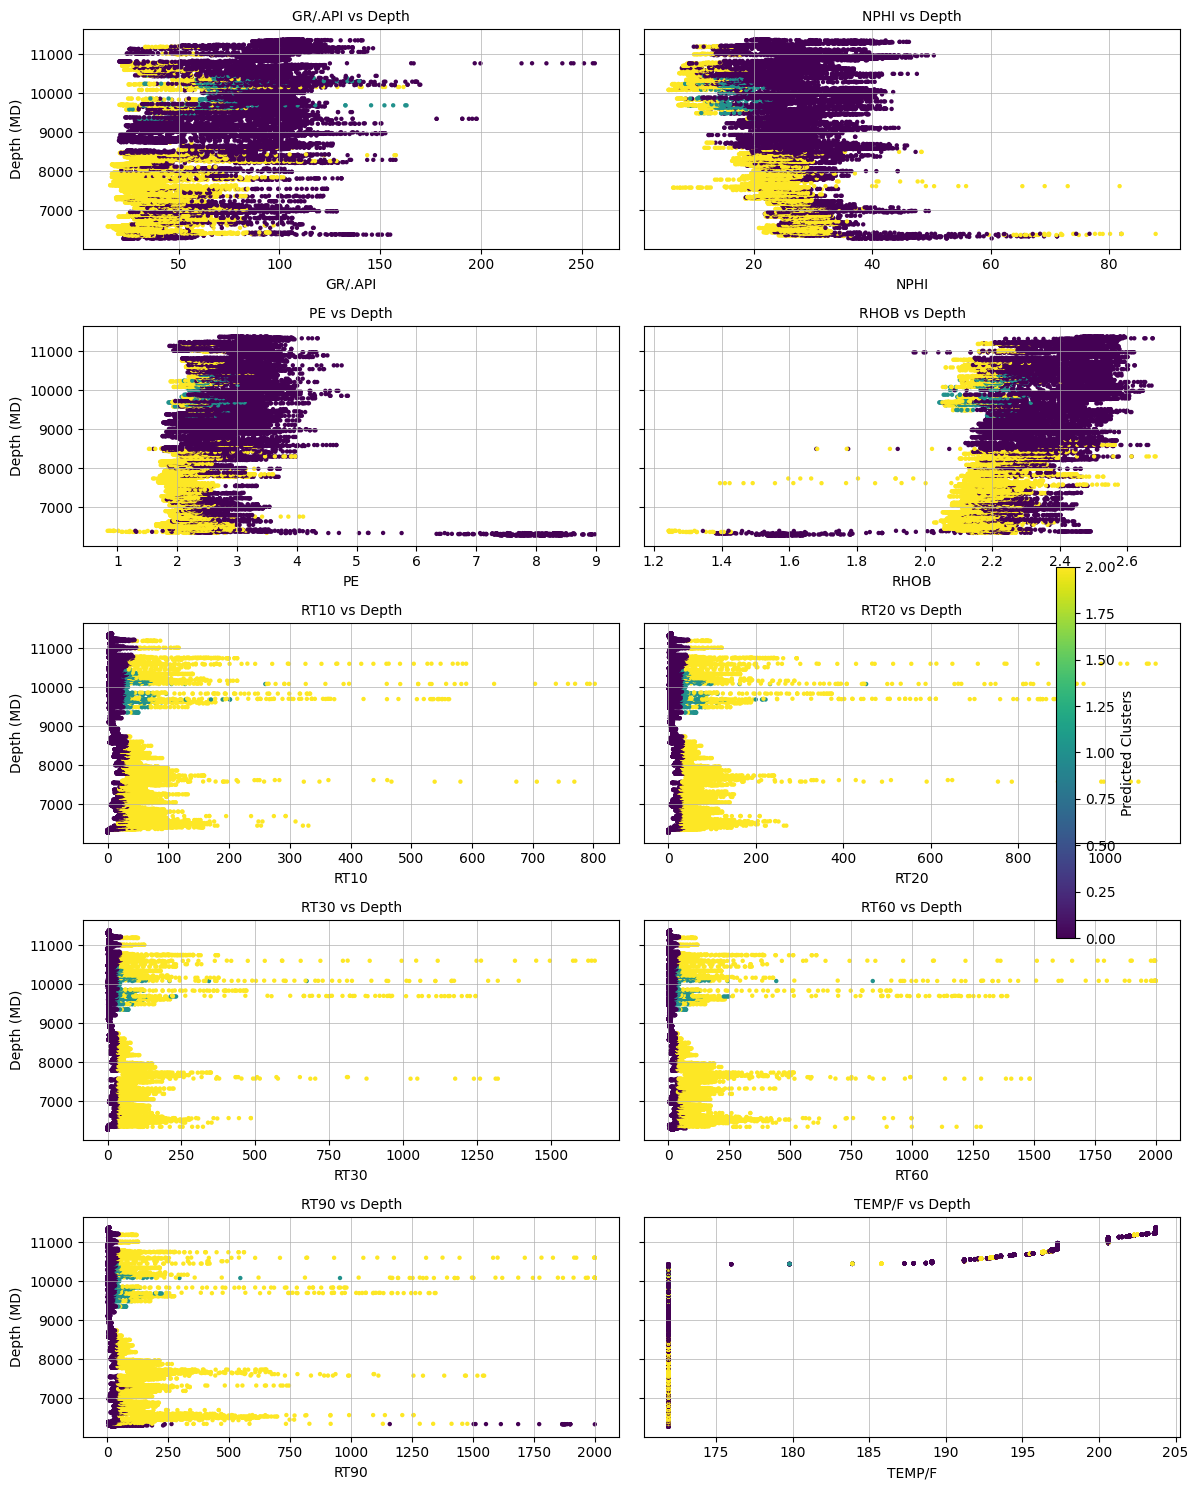

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the properties you want to plot against depth
properties = ['GR/.API', 'NPHI', 'PE', 'RHOB', 'RT10', 'RT20', 'RT30',\
       'RT60', 'RT90', 'TEMP/F']  # Replace with actual property names
depth = 'DEPTH_MD'  # Define the depth column
clusters = 'Pred_clusters'  # Column for cluster labels

# Number of rows and columns for the grid layout
n_cols = 2  # Number of columns in the grid
n_rows = (len(properties) + n_cols - 1) // n_cols  # Number of rows calculated to fit all properties

# Set up the figure and axes for multiple subplots in a grid layout
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 15), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each property and create a subplot for it
for i, prop in enumerate(properties):
    ax = axes[i]

    # Plot the property vs depth and color by clusters
    scatter = ax.scatter(df_clean[prop], df_clean[depth], c=df_clean[clusters], cmap='viridis', s=10, edgecolor='none')

    # Invert the y-axis (depth increases downwards)
    ax.invert_yaxis()

    # Set x and y labels
    ax.set_xlabel(prop)
    if i % n_cols == 0:  # Add y-label only for the first column
        ax.set_ylabel('Depth (MD)')

    # Add a title for each subplot
    ax.set_title(f'{prop} vs Depth', fontsize=10)

    # Set thinner grid lines
    ax.grid(True, linewidth=0.5)

# Turn off any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

# Add a color bar to show the cluster label meanings
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Predicted Clusters')

# Adjust layout to ensure there’s no overlap
plt.tight_layout()
plt.show()


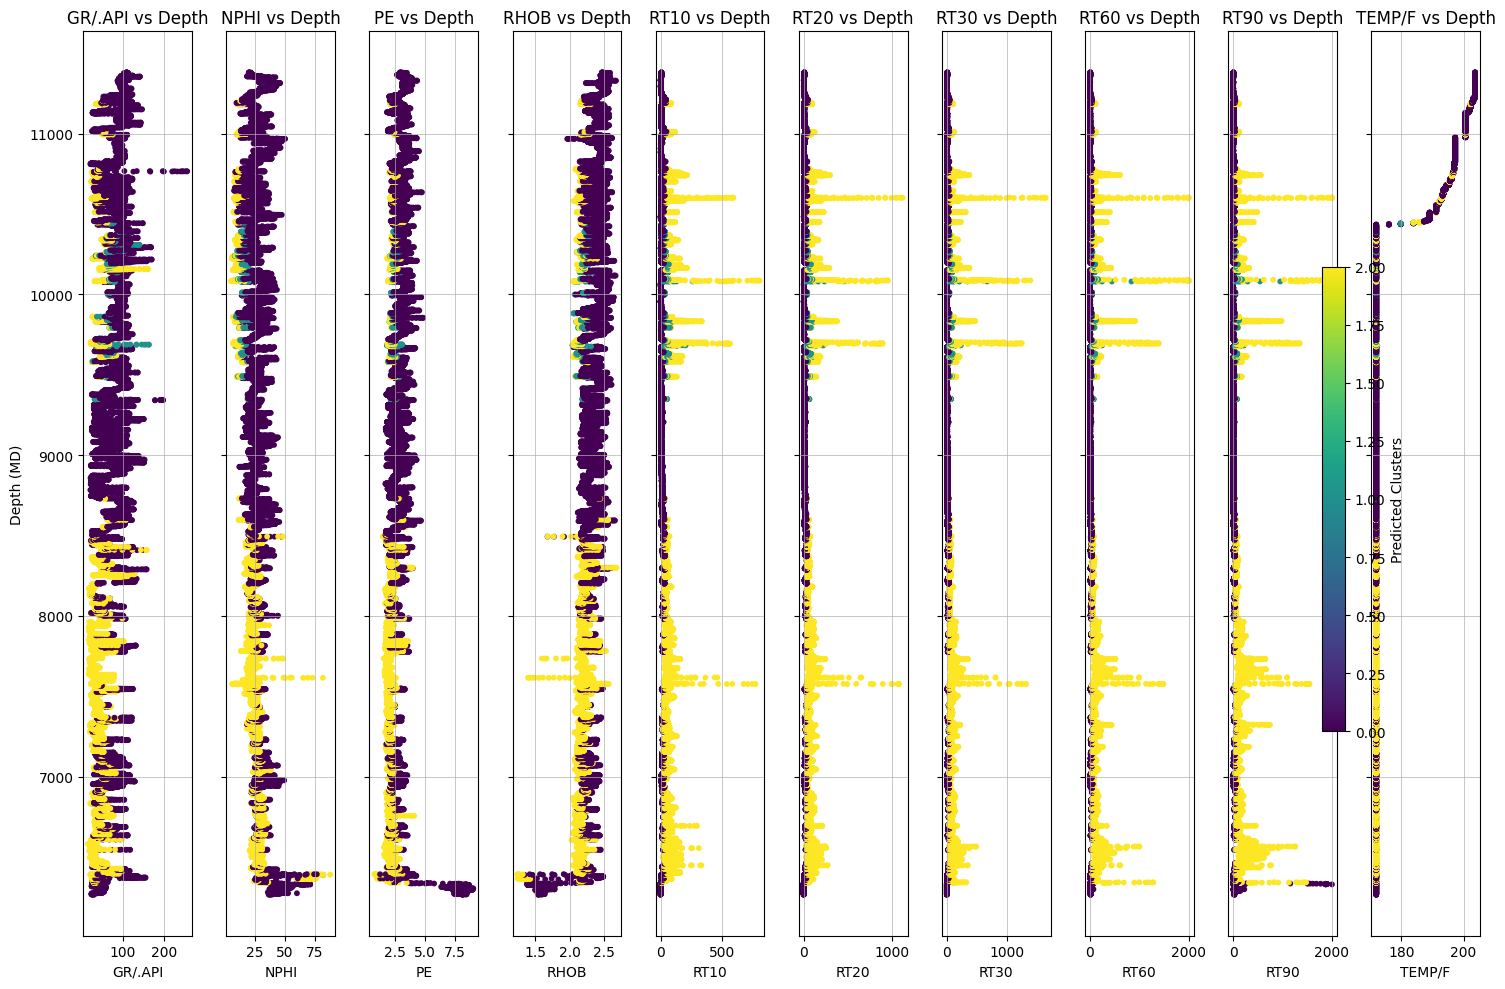

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the properties you want to plot against depth
properties = ['GR/.API', 'NPHI', 'PE', 'RHOB', 'RT10', 'RT20', 'RT30', 'RT60', 'RT90', 'TEMP/F']  # Actual property names
depth = 'DEPTH_MD'  # Define the depth column
clusters = 'Pred_clusters'  # Column for cluster labels

# Set up the figure and axes for multiple subplots
num_plots = len(properties)
fig, axes = plt.subplots(nrows=1, ncols=num_plots, figsize=(15, 10), sharey=True)

# Loop through each property and create a subplot for it
for i, prop in enumerate(properties):
    ax = axes[i]

    # Plot the property vs depth and color by clusters
    scatter = ax.scatter(df_clean[prop], df_clean[depth], c=df_clean[clusters], cmap='viridis', s=10)

    # Invert the y-axis (depth increases downwards)
    ax.invert_yaxis()

    # Set x and y labels
    ax.set_xlabel(prop)
    if i == 0:
        ax.set_ylabel('Depth (MD)')

    # Add gridlines
    ax.grid(True, linewidth=0.5)  # Enable gridlines and make them thinner

    # Add a title for each subplot
    ax.set_title(f'{prop} vs Depth')

# Add a color bar to show the cluster label meanings
cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Predicted Clusters')

# Adjust layout
plt.tight_layout()

plt.show()


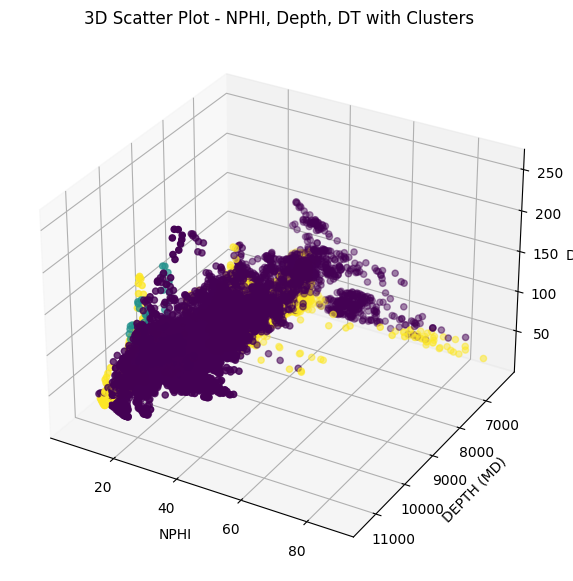

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(df_clean['NPHI'], df_clean['DEPTH_MD'], df_clean['GR/.API'], c=df_clean['Pred_clusters'], cmap='viridis', s=20)

ax.set_xlabel('NPHI')
ax.set_ylabel('DEPTH (MD)')
ax.set_zlabel('DT')

plt.gca().invert_yaxis()
plt.title('3D Scatter Plot - NPHI, Depth, DT with Clusters')
plt.show()


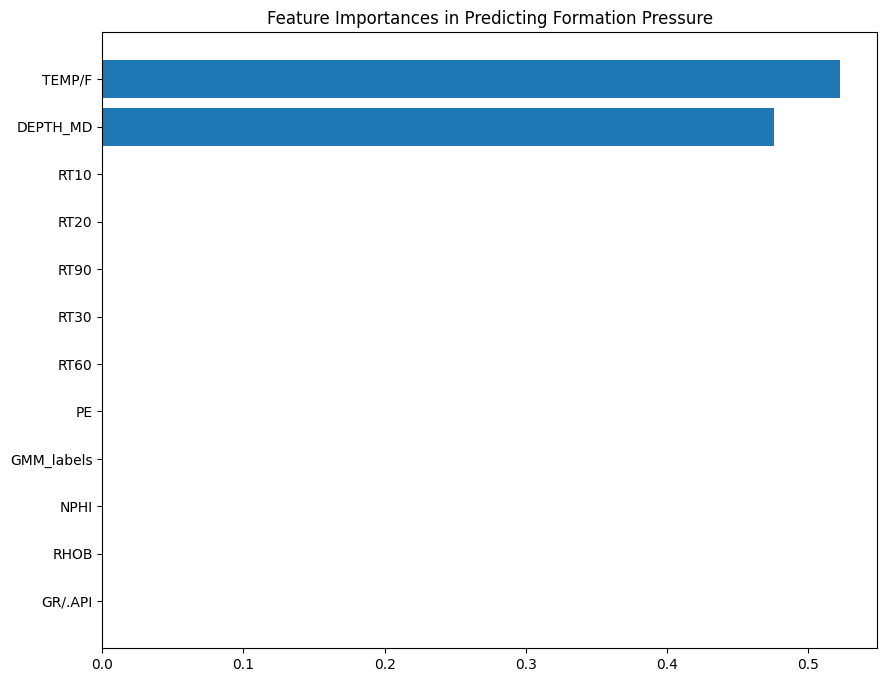

array([4.76301920e-01, 2.27694662e-06, 4.42643244e-06, 9.86042947e-06,
       2.63579502e-06, 2.50189347e-04, 1.25777781e-04, 9.72570934e-05,
       4.41725171e-05, 1.04674467e-04, 5.23050658e-01, 6.15128627e-06])

In [ ]:
import matplotlib.pyplot as plt

feature_importances = rfc_2.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features_2.columns[i] for i in sorted_idx])
plt.title('Feature Importances in Predicting Formation Pressure')
plt.show()
feature_importances

In [ ]:
core_df = pd.read_csv(r'/content/drive/MyDrive/Well_X4_table_PVT_3_1.csv')
core_df = core_df.drop(columns=['Sample', 'Depth,', 'So%', 'Sw%', 'Grain RHO G/CM3', '400PSI POR', '400PSI K_AIR'])
core_df = core_df.replace({'NF': np.nan})
core_df = core_df.dropna()
core_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 6 to 31
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   5500 PSI POR         24 non-null     float64
 1    K_AIR 5500 psi NCS  24 non-null     object 
 2   KK 5500 PSI          24 non-null     object 
dtypes: float64(1), object(2)
memory usage: 768.0+ bytes


In [ ]:
core_df = core_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
core_df['5500 PSI POR'] = core_df['5500 PSI POR'] / 100

core_df['PHIZ'] = core_df['5500 PSI POR'] / (1 - (core_df['5500 PSI POR']))
core_df['RQI'] = 0.0314 * (np.sqrt(core_df['KK 5500 PSI'] / core_df['5500 PSI POR']))
core_df['FZI'] = core_df['RQI'] / core_df['PHIZ']

In [ ]:
df_1 = core_df.copy()
df_1.head(8).to_excel('core_data_sample.xlsx')

The process converged after 2 iterations.
The final intercepts (mean FZI) for each HFU are approximately:
HFU 1: 1.10
HFU 2: 9.61
HFU 3: 9.61


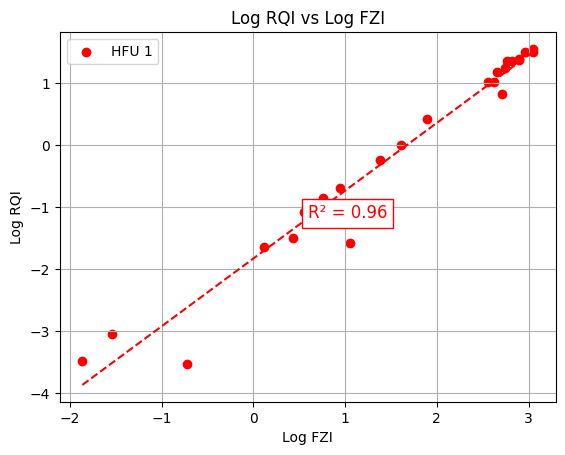

HFU results saved to HFU_results.xlsx


5500 PSI POR   K_AIR 5500 psi NCS  KK 5500 PSI      PHIZ       RQI  \
6          0.067                 3.98         2.88  0.071811  0.205868   
7          0.132               738.00       696.00  0.152074  2.280065   
8          0.179              2932.00      2833.00  0.218027  3.950267   
9          0.181              3065.00      2963.00  0.221001  4.017503   
10         0.177              1462.00      1398.00  0.215067  2.790594   
11         0.184              4339.00      4213.00  0.225490  4.751344   
12         0.199              3235.00      3130.00  0.248439  3.937996   
13         0.166               120.00       106.00  0.199041  0.793466   
14         0.165                35.90        30.10  0.197605  0.424103   
15         0.166               186.00       168.00  0.199041  0.998919   
16         0.187               477.00       445.00  0.230012  1.531753   
17         0.128                 8.55         6.60  0.146789  0.225474   
18         0.147                 7.28         5.57  0.172333  0.193285   
19         0.164                49.80        42.50  0.196172  0.505478   
20         0.057                 0.09         0.05  0.060445  0.029409   
21         0.166                 0.25         0.16  0.199041  0.030827   
23         0.181                 0.60         0.41  0.221001  0.047259   
25         0.164                23.80        19.50  0.196172  0.342393   
26         0.183              2323.00      2237.00  0.223990  3.471659   
27         0.188              3968.00      3849.00  0.231527  4.492879   
28         0.177              3825.00      3709.00  0.215067  4.545393   
29         0.186              2088.00      2008.00  0.228501  3.262534   
30         0.167              1357.00      1296.00  0.200480  2.766138   
31         0.188              2981.00      2881.00  0.231527  3.887070   

          FZI  HFU  
6    2.866786    1  
7   14.993157    1  
8   18.118262    1  
9   18.178645    1  
10  12.975472    1  
11  21.071177    1  
12  15.850929    1  
13   3.986452    1  
14   2.146216    1  
15   5.018665    1  
16   6.659441    1  
17   1.536042    1  
18   1.121580    1  
19   2.576705    1  
20   0.486535    1  
21   0.154879    1  
23   0.213839    1  
25   1.745370    1  
26  15.499156    1  
27  19.405412    1  
28  21.134793    1  
29  14.277971    1  
30  13.797565    1  
31  16.788834    1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df_1 is your DataFrame and already contains RQI and FZI data
mean_fzi = df_1['FZI'].mean()

# Step 2: Use mean FZI as initial intercepts
intercepts = [mean_fzi] * 3  # Assume 3 HFUs, initialize with mean FZI

# Variables for iteration
iteration = 0
tolerance = 0.01  # Set your tolerance level
converged = False

# Initialize an empty column for HFU assignment
df_1['HFU'] = np.nan

# Define colors and markers for plotting
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']  # Circle, Square, Triangle

# Classification and Iteration Process
while not converged:
    iteration += 1
    new_hfu = []

    # Assign samples to the nearest intercept
    for _, row in df_1.iterrows():
        log_rqi = np.log(row['RQI'])
        log_z = np.log(row['FZI'])
        distances = [abs(log_rqi - (intercept * log_z)) for intercept in intercepts]
        hfu_assignment = np.argmin(distances) + 1  # HFUs are 1-indexed
        new_hfu.append(hfu_assignment)

    df_1['HFU'] = new_hfu

    # Recalculate the intercepts using least squares regression
    new_intercepts = []
    for hfu in range(1, 4):  # Assuming 3 HFUs
        # Get data points for this HFU
        hfu_data = df_1[df_1['HFU'] == hfu]
        if not hfu_data.empty:
            X = np.log(hfu_data['FZI']).values.reshape(-1, 1)
            y = np.log(hfu_data['RQI']).values
            model = LinearRegression().fit(X, y)
            new_intercepts.append(model.coef_[0])  # Slope is the new intercept
        else:
            new_intercepts.append(intercepts[hfu - 1])  # No data, keep old intercept

    # Check for convergence
    if np.all(np.abs(np.array(new_intercepts) - np.array(intercepts)) < tolerance):
        converged = True
    intercepts = new_intercepts

# Display results
print(f"The process converged after {iteration} iterations.")
print("The final intercepts (mean FZI) for each HFU are approximately:")
for i, intercept in enumerate(intercepts):
    print(f"HFU {i + 1}: {intercept:.2f}")

# Plotting the HFUs
for hfu in range(1, 4):  # Loop over each HFU
    hfu_data = df_1[df_1['HFU'] == hfu]
    if not hfu_data.empty:
        # Scatter plot
        plt.scatter(np.log(hfu_data['FZI']), np.log(hfu_data['RQI']),
                    label=f'HFU {hfu}', color=colors[hfu - 1], marker=markers[hfu - 1])

        # Fit a linear regression model
        X = np.log(hfu_data['FZI']).values.reshape(-1, 1)
        y = np.log(hfu_data['RQI']).values
        model = LinearRegression().fit(X, y)

        # Predicted values for plotting the line
        x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_fit = model.predict(x_range)

        # Plot the regression line
        plt.plot(x_range, y_fit, color=colors[hfu - 1], linestyle='--')

        # Calculate and display the R² score
        y_pred = model.predict(X)
        r2 = r2_score(y, y_pred)
        plt.text(x_range.mean(), y_fit.mean(),
                 f'R² = {r2:.2f}', fontsize=12, color=colors[hfu - 1],
                 bbox=dict(facecolor='white', edgecolor=colors[hfu - 1]))

plt.title('Log RQI vs Log FZI')
plt.xlabel('Log FZI')
plt.ylabel('Log RQI')
plt.legend()
plt.grid(True)
plt.show()

# Step to export the results into an Excel file
# Saving the DataFrame with HFU, RQI, and FZI columns
# df_1[['DEPTH_MD', 'RQI', 'FZI', 'HFU']].to_excel('HFU_results.xlsx', index=False)
print("HFU results saved to HFU_results.xlsx")
df_1

In [ ]:
average_values = df_1.groupby('HFU').mean()

# Display average values
average_values

5500 PSI POR   K_AIR 5500 psi NCS  KK 5500 PSI      PHIZ       RQI  \
HFU                                                                       
1        0.162458          1384.427083  1334.990417  0.195861  2.061736   

          FZI  
HFU            
1    9.608495

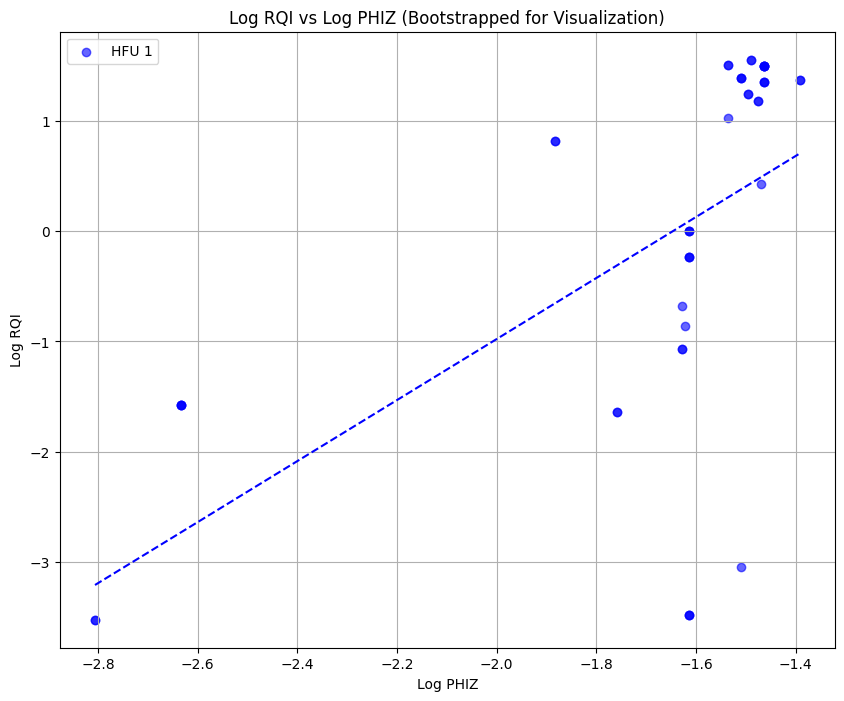

In [ ]:
from sklearn.utils import resample

synthetic_df = resample(df_1, replace=True, n_samples=2 * len(df_1), random_state=0)  # double the data size

# Step 2: Plot Log-Log RQI vs. PHIZ with Color-Coding for HFUs
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
markers = ['o', 'x', 's']

for hfu in synthetic_df['HFU'].unique():
    hfu_data = synthetic_df[synthetic_df['HFU'] == hfu]
    plt.scatter(np.log(hfu_data['PHIZ']), np.log(hfu_data['RQI']),
                label=f'HFU {hfu}', color=colors[hfu-1], marker=markers[hfu-1], alpha=0.6)

# Step 3: Fit Line for Each HFU
for hfu in df_1['HFU'].unique():
    hfu_data = df_1[df_1['HFU'] == hfu]
    X = np.log(hfu_data['PHIZ']).values.reshape(-1, 1)
    y = np.log(hfu_data['RQI']).values
    if len(hfu_data) > 1:  # Ensure there's enough data to fit a line
        model = LinearRegression().fit(X, y)
        x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_fit = model.predict(x_range)
        plt.plot(x_range, y_fit, color=colors[hfu-1], linestyle='--')

plt.title('Log RQI vs Log PHIZ (Bootstrapped for Visualization)')
plt.xlabel('Log PHIZ')
plt.ylabel('Log RQI')
plt.legend()
plt.grid(True)
plt.show()
